In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import f1_score


%matplotlib inline
pd.set_option('display.max_columns', 30)
sns.set_style('darkgrid')

In [2]:
data_train = pd.read_csv("train_dataset_train.csv")
data_test = pd.read_csv("test_dataset_test.csv")

In [3]:
print('train: ', data_train.shape)
print('test: ', data_test.shape)

train:  (13584, 24)
test:  (6691, 23)


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

In [5]:
# Пропуски в train
train_nan = data_train.isna().sum() / data_train.shape[0]
train_nan = train_nan[train_nan > 0].sort_values(ascending=False)
train_nan

Где_Находится_УЗ    0.101664
Год_Окончания_УЗ    0.095701
Уч_Заведение        0.090769
Пособие             0.074205
Изучаемый_Язык      0.060807
Регион_ПП           0.045495
Страна_Родители     0.033716
Город_ПП            0.032612
Страна_ПП           0.025545
Иностранец          0.022821
Общежитие           0.006331
Село                0.006331
Пол                 0.000515
dtype: float64

In [6]:
# Пропуски в test
test_nan = data_test.isna().sum() / data_test.shape[0]
test_nan = test_nan[test_nan > 0].sort_values(ascending=False)
test_nan

Где_Находится_УЗ    0.098640
Год_Окончания_УЗ    0.092213
Уч_Заведение        0.086385
Пособие             0.072336
Изучаемый_Язык      0.059184
Регион_ПП           0.043342
Город_ПП            0.031983
Страна_Родители     0.029592
Страна_ПП           0.023913
Иностранец          0.019429
Село                0.005530
Общежитие           0.005231
Пол                 0.000448
dtype: float64

Пропуски в train и test по столбцам распределены примерно одинаково

In [7]:
data_train.sample(5)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
5820,83808,20820,2017,Жен,ДН,Английский язык,1994-11-10 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,0.0,Россия,Алтайский край,г. Камень-на-Оби,0.0,1,1.0,Россия,0.0,0.0,0.0,25.0,37.0,4
2089,65796,19329,2014,Жен,СН,Английский язык,1996-07-24 00:00:00.000,"МБОУ ""Лицей №129""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,24.0,93.0,4
6486,49486,16894,2013,Муж,ОО,Английский язык,1994-12-23 00:00:00.000,"МБОУ ""Гимназия №74""",Алтайский край г. Барнаул,2013.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,31.0,87.0,4
12886,66233,18212,2014,Жен,ОО,Английский язык,1996-05-10 00:00:00.000,"КГБО школа-интернат ""Бийский лицей-интернат Ал...","Алтайский край, Бийск г",2014.0,0.0,Россия,Алтайский край,Барнаул,0.0,0,0.0,Россия,0.0,0.0,0.0,25.0,82.0,4
2700,64938,16842,2014,Муж,СН,Английский язык,1996-09-07 00:00:00.000,"МБОУ ""СОШ городского округа ЗАТО Сибирский""","Алтайский край, Сибирский ЗАТО",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,27.0,51.0,3


In [8]:
data_test.sample(5)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
4264,70233,17284,2015,Жен,ОО,Английский язык,1993-06-01 00:00:00.000,"ФГБОУ ВПО ""Алтайский государственный университет""","Алтайский край, Барнаул г",2015.0,0.0,Россия,Алтайский край,"Барнаул г, Южный рп",0.0,0,0.0,Россия,0.0,0.0,0.0,25.0,84.000
5256,54858,16986,2013,Жен,СН,NaN,1993-05-31 00:00:00.000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,62.000
6358,91027,22315,2019,Муж,ДН,Английский язык,2001-06-04 00:00:00.000,МБОУ СОШ №125 с углубленным изучением отдельны...,"Алтайский край, г. Барнаул",2019.0,0.0,Россия,Алтайский край,г. Барнаул,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,3.563
6341,49696,18161,2013,Жен,ОО,Английский язык,1994-11-22 00:00:00.000,"МБОУ ""Лицей №112""",г. Барнаул Алтайского края,2013.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,34.0,81.000
3579,82514,19816,2017,Жен,БН,Английский язык,1980-01-25 00:00:00.000,ГОУ ВПО Новосибирский государственный педагоги...,"Новосибирская область, г. Новосибирск",2010.0,0.0,Россия,Новосибирская область,Верх-Коен с,1.0,1,1.0,Россия,0.0,0.0,0.0,31.0,70.000


In [9]:
id_set_train = set(data_train['ID'].values)
id_set_test = set(data_test['ID'].values)
print('train - test:', len(id_set_train - id_set_test))
print('пересечение:' , len(id_set_train & id_set_test))
print('test - train:',len(id_set_test - id_set_train))

train - test: 13584
пересечение: 0
test - train: 6691


Пересечений в train и test по студентам нет

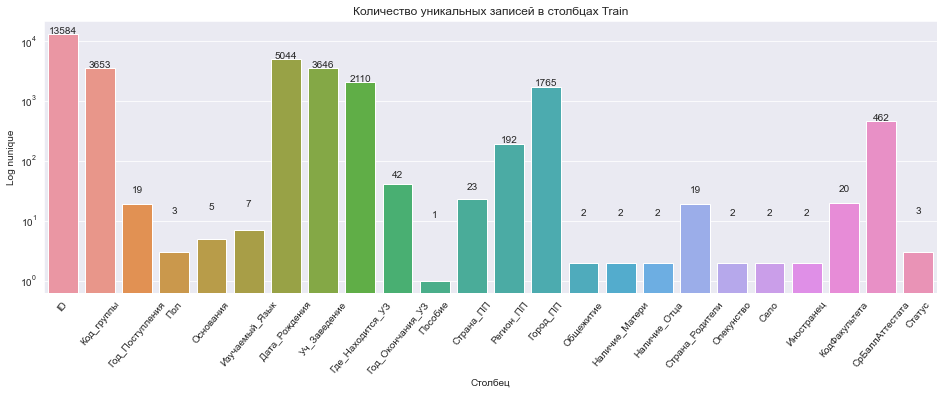

In [10]:
plt.figure(figsize=(16, 5))

cols = data_train.columns
nunique = [data_train[col].nunique() for col in cols] #уникальные записи

ax = sns.barplot(x=cols, y=nunique, log=True)
ax.set(xlabel='Столбец', ylabel='Log nunique', title='Количество уникальных записей в столбцах Train')

# Простовляем кол-во уникальных записей без log.
for p, uniq in zip(ax.patches, nunique):
    ax.text(p.get_x() + p.get_width()/2., uniq + 10, uniq, ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

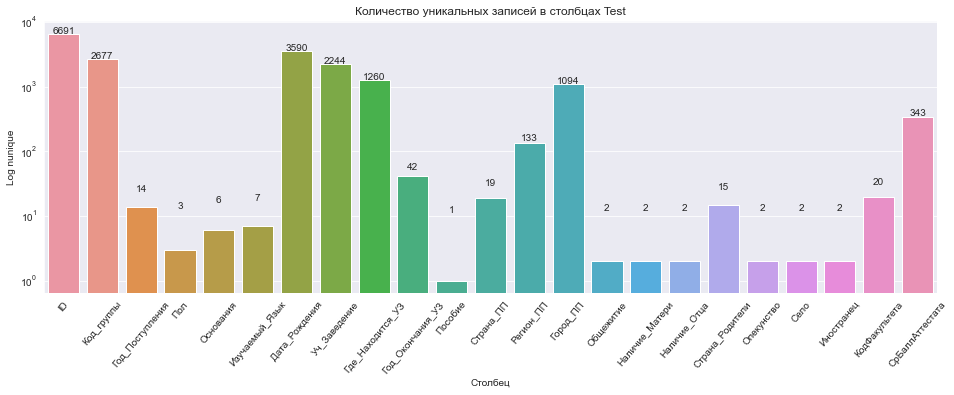

In [11]:
plt.figure(figsize=(16, 5))

cols = data_test.columns
nunique = [data_test[col].nunique() for col in cols] #уникальные записи

ax = sns.barplot(x=cols, y=nunique, log=True)
ax.set(xlabel='Столбец', ylabel='Log nunique', title='Количество уникальных записей в столбцах Test')

# Простовляем кол-во уникальных записей без log.
for p, uniq in zip(ax.patches, nunique):
    ax.text(p.get_x() + p.get_width()/2., uniq + 10, uniq, ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

### Статус

In [12]:
data_train['Статус'].value_counts()

 4    8249
 3    4721
-1     614
Name: Статус, dtype: int64

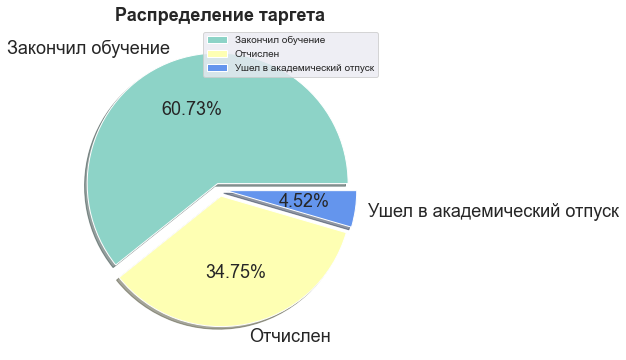

In [13]:
counts = data_train['Статус'].value_counts()
mylabels = ["Закончил обучение", "Отчислен",'Ушел в академический отпуск']
text_font = {"fontsize":18}
explode = [0.05 ,0.05, 0.05]
plt.figure(figsize=(6,6))
plt.pie(counts, labels = mylabels,autopct = "%0.2f%%", colors=['#8dd3c7','#feffb3','#6495ed'], explode = explode,textprops =text_font,shadow = True)
plt.title('Распределение таргета',size=18,fontweight = 'bold')
plt.legend()
plt.show()

Изменим кодирование таргета: 0 - Отчислен, 1 - Ушел в академический отпуск, 2 - Закончил обучение

In [14]:
data_train['Статус'] = data_train['Статус'].replace({3:0, 4:2, -1:1})

In [15]:
data_train['Статус'].value_counts()

2    8249
0    4721
1     614
Name: Статус, dtype: int64

### Код_группы, КодФакультета

Изменим тип данных с числового на категориальный

In [16]:
data_train['Код_группы'] = data_train['Код_группы'].astype('object')
data_test['Код_группы'] = data_test['Код_группы'].astype('object')
data_train['КодФакультета'] = data_train['КодФакультета'].astype('object')
data_test['КодФакультета'] = data_test['КодФакультета'].astype('object')

### Год_Поступления, Год_Окончания_УЗ

In [17]:
data_train['Год_Поступления'].value_counts()

2015    2353
2014    2290
2016    2271
2013    2070
2017    1460
2012    1394
2018    1147
2019     466
2020      48
2011      46
2010      19
2009       8
2007       5
2008       2
2212       1
2001       1
2004       1
2005       1
2003       1
Name: Год_Поступления, dtype: int64

In [18]:
data_test['Год_Поступления'].value_counts()

2014    1177
2015    1172
2016    1114
2013    1028
2017     714
2012     637
2018     544
2019     227
2020      39
2011      23
2010       8
2009       5
2007       2
2006       1
Name: Год_Поступления, dtype: int64

Значения > 2020 и < 2010, скоей всего являются выбросами

In [19]:
data_test.loc[((data_test['Год_Поступления'] <=2010) | (data_test['Год_Поступления'] >=2021)),'Год_Поступления'] = 2010
data_train.loc[((data_train['Год_Поступления'] <=2010) | (data_train['Год_Поступления'] >=2021)),'Год_Поступления'] = 2010

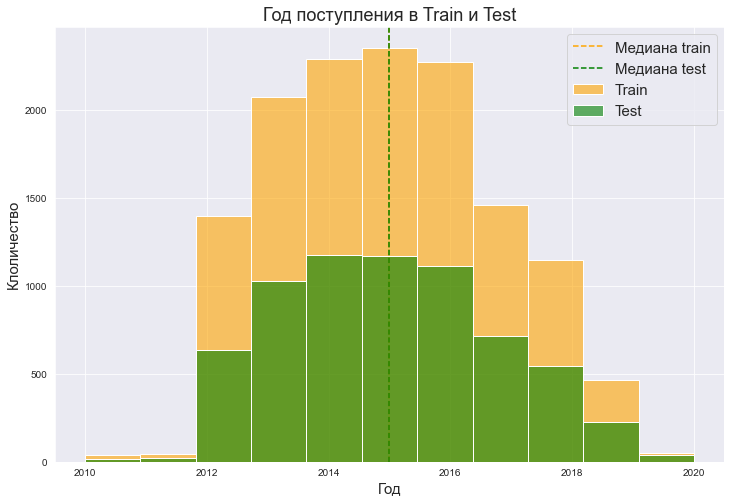

In [20]:
plt.figure(figsize=(12,8))

data_0 = data_train['Год_Поступления']
data_1 = data_test['Год_Поступления']

g_0 = sns.histplot(x=data_0,color='orange',alpha=0.6, bins = 11)
g_1 = sns.histplot(x=data_1,color='green',alpha=0.6, bins = 11)

g_0.axvline(data_0.median(),linestyle = '--',color='orange')
g_1.axvline(data_1.median(),linestyle = '--',color='green')

# g_0.set_xlim(2010,2021)
# g_1.set_xlim(2010,2021)

plt.ticklabel_format(style='plain', axis='x')
plt.title('Год поступления в Train и Test',size=18)
plt.xlabel('Год',size=15)
plt.ylabel('Клоличество',size=15)
plt.legend(['Медиана train','Медиана test','Train','Test'],fontsize=15)
plt.show()

In [21]:
data_test.loc[data_test['Год_Окончания_УЗ'] < 1980,'Год_Окончания_УЗ'] = 1980
data_train.loc[data_train['Год_Окончания_УЗ'] < 1980,'Год_Окончания_УЗ'] = 1980

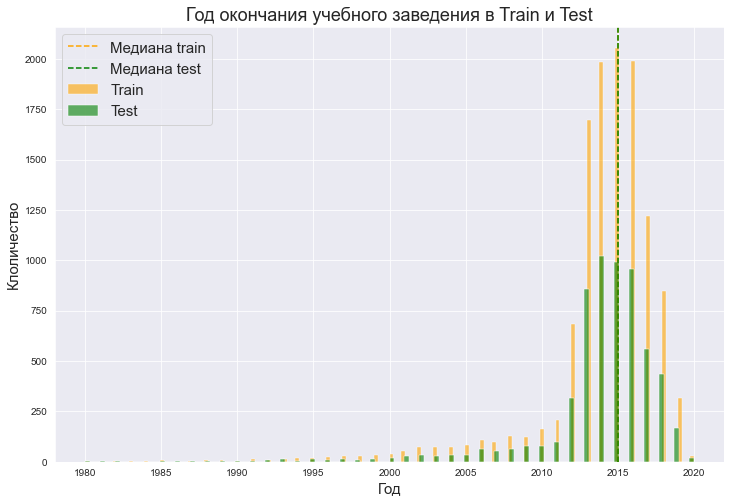

In [22]:
plt.figure(figsize=(12,8))

data_0 = data_train['Год_Окончания_УЗ']
data_1 = data_test['Год_Окончания_УЗ']

g_0 = sns.histplot(x=data_0,color='orange',alpha=0.6)
g_1 = sns.histplot(x=data_1,color='green',alpha=0.6)

g_0.axvline(data_0.median(),linestyle = '--',color='orange')
g_1.axvline(data_1.median(),linestyle = '--',color='green')

# g_0.set_xlim(2010,2021)
# g_1.set_xlim(2010,2021)

plt.ticklabel_format(style='plain', axis='x')
plt.title('Год окончания учебного заведения в Train и Test',size=18)
plt.xlabel('Год',size=15)
plt.ylabel('Клоличество',size=15)
plt.legend(['Медиана train','Медиана test','Train','Test'],fontsize=15)
plt.show()

In [23]:
data_train['Год_Рождения'] = pd.to_datetime(data_train['Дата_Рождения'],format= '%Y-%m-%d %H:%M:%S.%f').dt.year
data_test['Год_Рождения'] = pd.to_datetime(data_test['Дата_Рождения'],format= '%Y-%m-%d %H:%M:%S.%f').dt.year

In [24]:
data_test.loc[data_test['Год_Рождения'] < 1960,'Год_Рождения'] = 1960
data_train.loc[data_train['Год_Рождения'] < 1960,'Год_Рождения'] = 1960

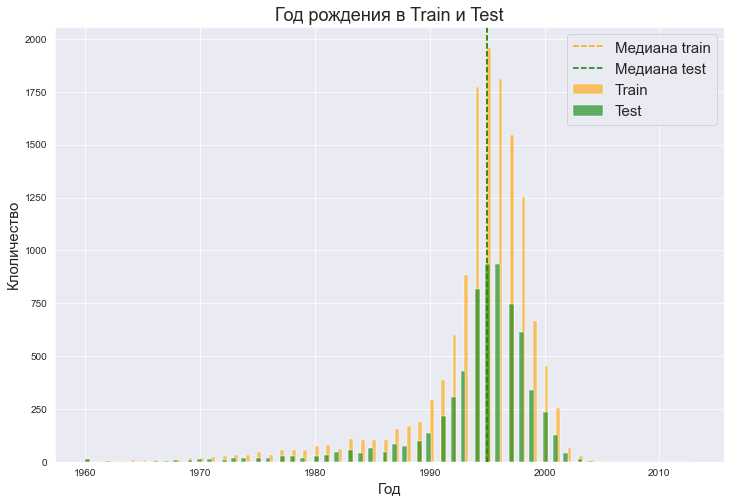

In [25]:
plt.figure(figsize=(12,8))

data_0 = data_train['Год_Рождения']
data_1 = data_test['Год_Рождения']

g_0 = sns.histplot(x=data_0,color='orange',alpha=0.6)
g_1 = sns.histplot(x=data_1,color='green',alpha=0.6)

g_0.axvline(data_0.median(),linestyle = '--',color='orange')
g_1.axvline(data_1.median(),linestyle = '--',color='green')

# g_0.set_xlim(2010,2021)
# g_1.set_xlim(2010,2021)

plt.ticklabel_format(style='plain', axis='x')
plt.title('Год рождения в Train и Test',size=18)
plt.xlabel('Год',size=15)
plt.ylabel('Клоличество',size=15)
plt.legend(['Медиана train','Медиана test','Train','Test'],fontsize=15)
plt.show()

### Пол, Основания, Изучаемый_Язык

Заменим все несоответствия в данных

In [26]:
data_test['Пол'].value_counts()

Жен    3974
Муж    2713
жен       1
Name: Пол, dtype: int64

In [27]:
data_train['Пол'].value_counts()

Жен    8133
Муж    5443
муж       1
Name: Пол, dtype: int64

In [28]:
data_test['Пол'] = data_test['Пол'].replace({'жен':'Жен'})
data_train['Пол'] = data_train['Пол'].replace({'муж':'Муж'})

In [29]:
data_test['Пол'] = data_test['Пол'].replace({'Жен':0, 'Муж':1})
data_train['Пол'] = data_train['Пол'].replace({'Жен':0, 'Муж':1})

In [30]:
data_test['Основания'].value_counts() 

ОО    2565
СН    2177
ДН     972
БН     873
ЦН     103
ЛН       1
Name: Основания, dtype: int64

In [31]:
data_train['Основания'].value_counts() 

ОО    5084
СН    4558
БН    1882
ДН    1853
ЦН     207
Name: Основания, dtype: int64

In [32]:
data_test['Основания'] = data_test['Основания'].replace({'ЛН':'ДН'})

In [33]:
data_train['Изучаемый_Язык'].value_counts() 

Английский язык                  10450
Немецкий язык                     2219
Французский язык                    54
Русский язык                        11
Иностранный язык (Английский)       10
Англиийский                         10
Иностранный язык (Немецкий)          4
Name: Изучаемый_Язык, dtype: int64

In [34]:
data_test['Изучаемый_Язык'].value_counts() 

Английский язык                  5202
Немецкий язык                    1047
Французский язык                   28
Англиийский                         8
Иностранный язык (Английский)       8
Русский язык                        1
Английский, немецкий языки          1
Name: Изучаемый_Язык, dtype: int64

In [35]:
to_replace = {'Русский язык':'Английский язык', 'Иностранный язык (Английский)':'Английский язык',
              'Англиийский':'Английский язык', 'Иностранный язык (Немецкий)': 'Немецкий язык'}
data_train['Изучаемый_Язык'] = data_train['Изучаемый_Язык'].replace(to_replace)

In [36]:
to_replace = {'Англиийский':'Английский язык', 'Иностранный язык (Английский)':'Английский язык',
              'Русский язык':'Английский язык', 'Английский, немецкий языки': 'Английский язык'}
data_test['Изучаемый_Язык'] = data_test['Изучаемый_Язык'].replace(to_replace)

### Уч_Заведение

Составим 5 категорий: ВУЗ, Колледж, Школа, Лицей, Гимназия 

In [37]:
data_train['Уч_Заведение'].value_counts()

ФГБОУ ВО Алтайский государственный университет                                   1359
ФГБОУ ВПО "Алтайский государственный университет"                                1025
ФГБОУ ВПО Алтайский государственный университет                                   113
ФГБОУ ВО Алтайский государственный технический университет им. И.И. Ползунова      88
Алтайский государственный университет                                              79
                                                                                 ... 
МБОУ "СОШ №89 с углублённым изучением отдельных предметов"                          1
МОУ"Солтонская СОШ"                                                                 1
МБОУ "Гимназия №3" г.Рубцовска Алтайский край                                       1
МБОУ СОШ №128                                                                       1
МКОУ "Георгиевская СОШ"                                                             1
Name: Уч_Заведение, Length: 3646, dtype: int64

In [38]:
data_test['Уч_Заведение'].value_counts()

ФГБОУ ВО Алтайский государственный университет                                   624
ФГБОУ ВПО "Алтайский государственный университет"                                532
ФГБОУ ВПО Алтайский государственный университет                                   60
ФГБОУ ВО Алтайский государственный технический университет им. И.И. Ползунова     47
МБОУ "Гимназия №42"                                                               40
                                                                                ... 
ФГБОУ ВО "Алтайский государственный университет" г. Барнаул                        1
КГБПОУ Бийский государствнный колледж                                              1
МБОУ "Ремзаводская СОШ" с. Павловск                                                1
СОУ №2                                                                             1
ГУ Павлодарский профессиональный лицей №7                                          1
Name: Уч_Заведение, Length: 2244, dtype: int64

In [39]:
def search_maching(lst, string):
    for i in lst:
        if i in string:
            return True 
    return False

In [40]:
def match_study_place(loc_row):
    if loc_row is not np.nan:
        if search_maching(['фгбоу', 'впо', 'кгбпоу', 'академия', 'университет', 'универститет', 'институт'], loc_row):
            return 'ВУЗ'
        elif search_maching(['спо', 'колледж', 'техникум', 'училище'], loc_row):
            return 'Колледж' 
        elif search_maching(['сош', 'школа', 'оош', 'соу', ' ош','ош ', ' cш','cш ', 
                             'осш', '№', 'общеобразовательное', 'кадетский'], loc_row):
            return 'Школа'
        elif search_maching(['лицей'], loc_row):
            return 'Лицей'
        elif search_maching(['гимназия'], loc_row):
            return 'Гимназия'
        else:
            return np.nan
    else:
        return np.nan 


In [41]:
data_train['Уч_Заведение'] = data_train['Уч_Заведение'].str.lower().apply(lambda row: match_study_place(row))
data_test['Уч_Заведение'] = data_test['Уч_Заведение'].str.lower().apply(lambda row: match_study_place(row))

In [42]:
data_train['Уч_Заведение'].value_counts()

Школа       6582
ВУЗ         4619
Колледж      753
Лицей        260
Гимназия      43
Name: Уч_Заведение, dtype: int64

### Где_Находится_УЗ

Заменим признак на бинарный  в зависимости от того находится ли учебное заведение в Алтае.

In [43]:
data_train['Где_Находится_УЗ'].value_counts()

Алтайский край, Барнаул г                         2413
Алтайский край, г. Барнаул                        1919
Россия, Алтайский край, г Барнаул                 1264
Алтайский край, Бийск г                            248
Алтайский край г. Барнаул                          228
                                                  ... 
с. Черёмушкино, Залесовского района                  1
г. Шемонаиха ВКО, реапублика Казахстан               1
Россия, Приморский край, г Находка                   1
Алтайский край, Бийс г                               1
Алтайский край, Ребрихинский р-н, Георгиевка с       1
Name: Где_Находится_УЗ, Length: 2110, dtype: int64

In [44]:
def altay_or_not(loc_row):
    if loc_row is not np.nan:
        return 1 if 'алтай' in loc_row else 0
    else:
        return np.nan 


In [45]:
data_train['Где_Находится_УЗ'] = data_train['Где_Находится_УЗ'].str.lower().apply(lambda row: altay_or_not(row))
data_test['Где_Находится_УЗ'] = data_test['Где_Находится_УЗ'].str.lower().apply(lambda row: altay_or_not(row))

In [46]:
data_train['Где_Находится_УЗ'].value_counts()

1.0    9611
0.0    2592
Name: Где_Находится_УЗ, dtype: int64

In [47]:
data_test['Где_Находится_УЗ'].value_counts()

1.0    4749
0.0    1282
Name: Где_Находится_УЗ, dtype: int64

### Пособие

Не информативный пизнак, возможно пропуски это наличие пособия.

In [48]:
data_train['Пособие'].value_counts()

0.0    12576
Name: Пособие, dtype: int64

In [49]:
data_test['Пособие'].value_counts()

0.0    6207
Name: Пособие, dtype: int64

### Страна_ПП

Унифицируем различные написания стран

In [50]:
data_test['Страна_ПП'].value_counts()

Россия                   6127
Казахстан                 194
Китай                      81
Таджикистан                42
РОССИЯ                     34
Кыргызстан                 20
Киргизия                   12
Узбекистан                  4
Кыргызская Республика       3
Казахстан респ              3
Кыргызия                    2
Казахстан Респ              2
Республика Казахстан        1
Монголия                    1
Казахстан ВКО               1
КИТАЙ                       1
КАЗАХСТАН                   1
Афганистан                  1
Туркменистан                1
Name: Страна_ПП, dtype: int64

In [51]:
data_train['Страна_ПП'].value_counts()

Россия                    12435
Казахстан                   415
Китай                       148
Таджикистан                 118
РОССИЯ                       37
Кыргызстан                   32
Киргизия                     21
Кыргызия                      6
Казахстан Респ                3
Казахстан респ                3
Росссия                       2
Кыргызская Республика         2
Армения                       2
Таджикистан Респ              2
Туркменистан                  2
Монголия                      2
Республика Таджикистан        1
Республика Казахстан          1
Казахстан ВКО                 1
Нигерия                       1
Франция                       1
Узбекистан                    1
Украина                       1
Name: Страна_ПП, dtype: int64

In [52]:
def replace_country(loc_row):
    if loc_row is not np.nan:
        if search_maching(['рос'], loc_row):
            return 'Россия'
        elif search_maching(['казах'], loc_row):
            return 'Казахстан' 
        elif search_maching(['таджи'], loc_row):
            return 'Таджикистан'
        elif search_maching(['ргыз'], loc_row):
            return 'Кыргызстан'
        elif search_maching(['китай'], loc_row):
            return 'Китай'
        else:
            return 'Остальное'
    else:
        return np.nan 


In [53]:
data_train['Страна_ПП'] = data_train['Страна_ПП'].str.lower().apply(lambda row: replace_country(row))
data_test['Страна_ПП'] = data_test['Страна_ПП'].str.lower().apply(lambda row: replace_country(row))

In [54]:
data_train['Страна_ПП'].value_counts()

Россия         12474
Казахстан        423
Китай            148
Таджикистан      121
Кыргызстан        40
Остальное         31
Name: Страна_ПП, dtype: int64

### Регион_ПП, Город_ПП

Сделаем бинарный признак: Алтай или нет. Унифицируем различные написания основных городов.

In [55]:
data_test['Регион_ПП'].value_counts()

Алтайский край                5722
Республика Алтай               100
Восточно-Казахстанская обл      79
Алтай Респ                      76
Кемеровская обл                 26
                              ... 
пров. Хубэй                      1
Гиссарский р-н                   1
Согдийская область               1
Дагестан респ                    1
Чуйская область                  1
Name: Регион_ПП, Length: 133, dtype: int64

In [56]:
data_train['Регион_ПП'].value_counts()

Алтайский край                11492
Алтай Респ                      204
Республика Алтай                203
Восточно-Казахстанская обл      193
Кемеровская область              53
                              ...  
Баткенская область                1
Желал-Абадская обл                1
Магаданская Обл                   1
Джалал-Абадская                   1
Шэньси провинция                  1
Name: Регион_ПП, Length: 192, dtype: int64

In [57]:
data_train['Регион_ПП'] = data_train['Регион_ПП'].str.lower().apply(lambda row: altay_or_not(row))
data_test['Регион_ПП'] = data_test['Регион_ПП'].str.lower().apply(lambda row: altay_or_not(row))

In [58]:
data_test['Регион_ПП'].value_counts()

1.0    5912
0.0     489
Name: Регион_ПП, dtype: int64

In [59]:
data_train['Регион_ПП'].value_counts()

1.0    11952
0.0     1014
Name: Регион_ПП, dtype: int64

In [60]:
data_train['Город_ПП'].value_counts()

Барнаул г         3735
г. Барнаул        1727
Барнаул           1174
Бийск г            246
Новоалтайск г      197
                  ... 
Марушка              1
с. Гилево            1
Чернышевский п       1
Кисилёвск г          1
Шила с               1
Name: Город_ПП, Length: 1765, dtype: int64

In [61]:
data_test['Город_ПП'].value_counts()

Барнаул г            1872
г. Барнаул            879
Барнаул               575
Бийск г               120
г. Бийск               93
                     ... 
с. Степнной Кучук       1
Прокопьевск             1
Заводское с             1
Ананьевка с             1
Чемал                   1
Name: Город_ПП, Length: 1094, dtype: int64

In [62]:
def replace_city(loc_row):
    if loc_row is not np.nan:
        if search_maching(['барнаул'], loc_row):
            return 'Барнаул'
        elif search_maching(['бийск'], loc_row):
            return 'Бийск' 
        elif search_maching(['камень-на-оби'], loc_row):
            return 'Камень-на-Оби'
        elif search_maching(['горно-алтайск'], loc_row):
            return 'Горно-Алтайск'
        elif search_maching(['рубцовск'], loc_row):
            return 'Рубцовск'
        elif search_maching(['новоалтайск'], loc_row):
            return 'Новоалтайск'
        
        elif search_maching(['славгород'], loc_row):
            return 'Славгород'
        elif search_maching(['заринск'], loc_row):
            return 'Заринск'
        elif search_maching(['павловск'], loc_row):
            return 'Павловск'
        else:
            return 'Остальное'
    else:
        return np.nan 
  

In [63]:
data_train['Город_ПП'] = data_train['Город_ПП'].str.lower().apply(lambda row: replace_city(row))
data_test['Город_ПП'] = data_test['Город_ПП'].str.lower().apply(lambda row: replace_city(row))

In [64]:
data_train['Город_ПП'].value_counts()

Барнаул          6868
Остальное        4506
Бийск             540
Новоалтайск       398
Рубцовск          190
Камень-на-Оби     179
Славгород         132
Заринск           129
Горно-Алтайск     113
Павловск           86
Name: Город_ПП, dtype: int64

### Общежитие,	Наличие_Матери,	Наличие_Отца	

In [65]:
print(data_train['Общежитие'].value_counts())
print()
print(data_test['Общежитие'].value_counts())


0.0    10530
1.0     2968
Name: Общежитие, dtype: int64

0.0    5169
1.0    1487
Name: Общежитие, dtype: int64


In [66]:
print(data_train['Наличие_Матери'].value_counts())
print()
print(data_test['Наличие_Матери'].value_counts())


1    6948
0    6636
Name: Наличие_Матери, dtype: int64

1    3354
0    3337
Name: Наличие_Матери, dtype: int64


In [67]:
print(data_train['Наличие_Отца'].value_counts())
print()
print(data_test['Наличие_Отца'].value_counts())


1.0    6922
0.0    6662
Name: Наличие_Отца, dtype: int64

1.0    3350
0.0    3341
Name: Наличие_Отца, dtype: int64


### Страна_Родители

In [68]:
data_train['Страна_Родители'].value_counts()

Россия                    12239
Казахстан                   514
Китай                       147
Таджикистан                 133
Кыргызстан                   37
Киргизия                     31
Туркменистан                  5
Узбекистан                    3
Армения                       3
Кыргызская Республика         3
Республика Таджикистан        2
Монголия                      2
Республика Молдова            1
Нигерия                       1
Германия                      1
Республика Казахстан          1
казахстан                     1
Украина                       1
КНР                           1
Name: Страна_Родители, dtype: int64

In [69]:
data_test['Страна_Родители'].value_counts()

Россия                    6073
Казахстан                  239
Китай                       82
Таджикистан                 45
Кыргызстан                  24
Киргизия                    14
Кыргызская Республика        3
Узбекистан                   3
Афганистан                   2
РОССИЯ                       2
Туркменистан                 2
Монголия                     1
Республика Таджикистан       1
Чеченская республика         1
Кыргызия                     1
Name: Страна_Родители, dtype: int64

In [70]:
data_train['Страна_Родители'] = data_train['Страна_Родители'].str.lower().apply(lambda row: replace_country(row))
data_test['Страна_Родители'] = data_test['Страна_Родители'].str.lower().apply(lambda row: replace_country(row))

In [71]:
data_train['Страна_Родители'].value_counts()

Россия         12239
Казахстан        516
Китай            147
Таджикистан      135
Остальное         49
Кыргызстан        40
Name: Страна_Родители, dtype: int64

### Опекунство, Село, Иностранец

Не информативный признак, сильный перекос в данных.

In [72]:
print(data_train['Опекунство'].value_counts())
print()
print(data_test['Опекунство'].value_counts())


0.0    13578
1.0        6
Name: Опекунство, dtype: int64

0.0    6685
1.0       6
Name: Опекунство, dtype: int64


In [73]:
print(data_train['Село'].value_counts())
print()
print(data_test['Село'].value_counts())


0.0    10401
1.0     3097
Name: Село, dtype: int64

0.0    5170
1.0    1484
Name: Село, dtype: int64


In [74]:
print(data_train['Иностранец'].value_counts())
print()
print(data_test['Иностранец'].value_counts())


0.0    12337
1.0      937
Name: Иностранец, dtype: int64

0.0    6095
1.0     466
Name: Иностранец, dtype: int64


### СрБаллАттестата

Поступление по егэ и аттестату в одной колонке, но у них разные бальные системы. До множим показатель аттестата на 20, чтобы перевести в 100 бальную шкалу.  
Создадим признак поступал ли абитуриент по егэ.  
Четырехзначные числа сдвигаем на 3 разряда влево и умножаем на 20.

In [75]:
data_train['СрБаллАттестата'].value_counts()

70.0000      332
60.0000      324
80.0000      309
65.0000      302
55.0000      291
            ... 
4.2631         1
4.9440         1
4.2170         1
3.7060         1
3647.0000      1
Name: СрБаллАттестата, Length: 462, dtype: int64

In [76]:
def ege_or_not(row):
    return 1 if row > 5 else 0

In [77]:
def covert_to_100_point(row):
    if row >100:
        return row/1000 * 20
    return row if row > 5 else row*20

In [78]:
data_train['Тип_экзамена'] = data_train['СрБаллАттестата'].apply(lambda row: ege_or_not(row))
data_train['СрБаллАттестата'] = data_train['СрБаллАттестата'].apply(lambda row: covert_to_100_point(row))
data_test['Тип_экзамена'] = data_test['СрБаллАттестата'].apply(lambda row: ege_or_not(row))
data_test['СрБаллАттестата'] = data_test['СрБаллАттестата'].apply(lambda row: covert_to_100_point(row))

In [79]:
data_test.loc[data_test['СрБаллАттестата'] < 30,'СрБаллАттестата'] = 30
data_train.loc[data_train['СрБаллАттестата'] < 30,'СрБаллАттестата'] = 30

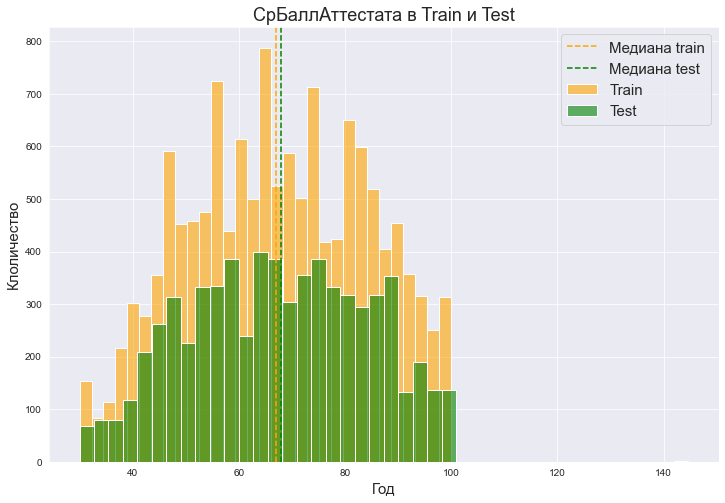

In [80]:
plt.figure(figsize=(12,8))

data_0 = data_train['СрБаллАттестата']
data_1 = data_test['СрБаллАттестата']

g_0 = sns.histplot(x=data_0,color='orange',alpha=0.6)
g_1 = sns.histplot(x=data_1,color='green',alpha=0.6)

g_0.axvline(data_0.median(),linestyle = '--',color='orange')
g_1.axvline(data_1.median(),linestyle = '--',color='green')

# g_0.set_xlim(2010,2021)
# g_1.set_xlim(2010,2021)

plt.ticklabel_format(style='plain', axis='x')
plt.title('СрБаллАттестата в Train и Test',size=18)
plt.xlabel('Год',size=15)
plt.ylabel('Клоличество',size=15)
plt.legend(['Медиана train','Медиана test','Train','Test'],fontsize=15)
plt.show()

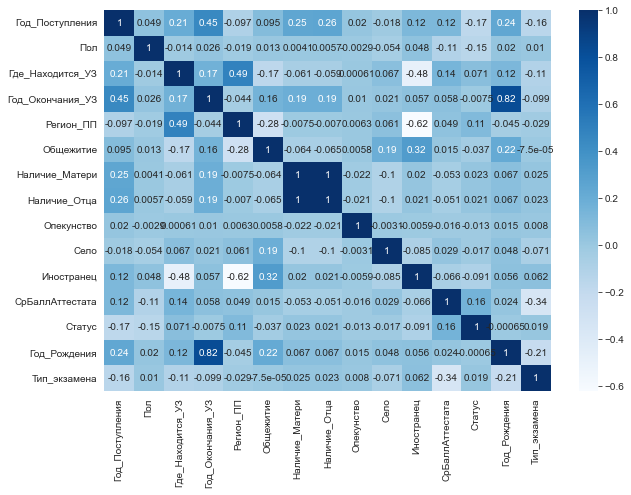

In [81]:
data_train_corr = data_train.drop(['ID', 'Пособие'],axis=1).corr()
plt.figure(figsize=(10,7))
sns.heatmap(data_train_corr, cmap="Blues", annot=True)
plt.show()

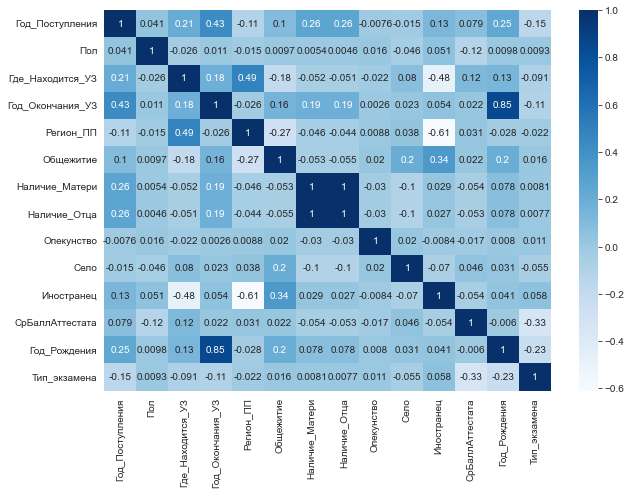

In [82]:
data_test_corr = data_test.drop(['ID', 'Пособие'],axis=1).corr()
plt.figure(figsize=(10,7))
sns.heatmap(data_test_corr, cmap="Blues", annot=True)
plt.show()

# Feature

In [83]:
data_train['delta_поступления'] = data_train['Год_Поступления']  - data_train['Год_Окончания_УЗ']
data_test['delta_поступления'] = data_test['Год_Поступления']  - data_test['Год_Окончания_УЗ']

data_train['Возраст_на_мом_пост'] = data_train['Год_Поступления']  - data_train['Год_Рождения']
data_test['Возраст_на_мом_пост'] = data_test['Год_Поступления']  - data_test['Год_Рождения']

In [84]:
all_data = pd.concat([data_train, data_test], ignore_index = True)

In [86]:
all_data['Колво_чел_группе'] = all_data[['Код_группы','ID']].groupby('Код_группы', as_index=False).transform('count')
all_data['Ср_балл_группе'] = all_data[['Код_группы','СрБаллАттестата']].groupby('Код_группы', as_index=False).transform('mean')

all_data['Std_балл_группе'] = all_data[['Код_группы','СрБаллАттестата']].groupby('Код_группы', as_index=False).transform('std')
all_data['Std_Год_Поступления'] = all_data[['Код_группы','Год_Поступления']].groupby('Код_группы', as_index=False).transform('std')
all_data['Std_Год_Рождения'] = all_data[['Код_группы','Год_Рождения']].groupby('Код_группы', as_index=False).transform('std')
all_data['Std_Год_Окончания_УЗ'] = all_data[['Код_группы','Год_Окончания_УЗ']].groupby('Код_группы', as_index=False).transform('std')

all_data['Кол_группы_на_фак'] = all_data[['КодФакультета','Код_группы']].groupby('КодФакультета', as_index=False).transform('count')
all_data['СрБаллАттестата_на_фак'] = all_data[['КодФакультета','СрБаллАттестата']].groupby('КодФакультета', as_index=False).transform('mean')

all_data['Std_балл_группе_фак'] = all_data[['КодФакультета','СрБаллАттестата']].groupby('КодФакультета', as_index=False).transform('std')
all_data['Std_Год_Поступления_фак'] = all_data[['КодФакультета','Год_Поступления']].groupby('КодФакультета', as_index=False).transform('std')
all_data['Std_Год_Рождения_фак'] = all_data[['КодФакультета','Год_Рождения']].groupby('КодФакультета', as_index=False).transform('std')
all_data['Std_Год_Окончания_УЗ_фак'] = all_data[['КодФакультета','Год_Окончания_УЗ']].groupby('КодФакультета', as_index=False).transform('std')


In [87]:
budget = all_data[all_data['Основания'] == 'БН'].groupby('Код_группы').count()['ID'].rename('Кол_бюджетников')
all_data = pd.merge(all_data, budget, how="left", on='Код_группы') 
all_data['Кол_бюджетников'] = all_data['Кол_бюджетников'].fillna(0)
all_data['Процент_бюджетников'] = all_data['Кол_бюджетников'] / all_data['Колво_чел_группе']

# Model 

In [88]:
data_train = all_data[:data_train.shape[0]]
data_test = all_data[data_train.shape[0] :]
data_test.drop('Статус', axis=1, inplace =True)

C:\Users\yanbe\AppData\Local\Temp\ipykernel_18056\2382704082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop('Статус', axis=1, inplace =True)


In [90]:
to_drop = ['ID', 'Пособие', 'Опекунство', 'Дата_Рождения', 'Наличие_Отца']

In [91]:
data_train = data_train.drop(to_drop, axis=1)
data_test = data_test.drop(to_drop, axis=1)

In [92]:
cat_features = ['Код_группы', 'Пол', 'Основания', 'Изучаемый_Язык',
       'Уч_Заведение', 'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП', 'Город_ПП', 
       'Общежитие', 'Наличие_Матери','Страна_Родители',
        'Село', 'Иностранец', 'КодФакультета', 'Тип_экзамена']

In [93]:
num_features = 'Год_Поступления','Год_Окончания_УЗ', 'СрБаллАттестата', 'delta_поступления', 'Год_Рождения', 'Родители',  'Колво_чел_группе', 'Ср_балл_группе'

In [94]:
target = 'Статус'

In [95]:
for col_name in cat_features: 
    data_train[col_name] = data_train[col_name].astype(str)
    data_test[col_name] = data_test[col_name].astype(str)

In [96]:
from sklearn.model_selection import KFold, StratifiedKFold 
from catboost import CatBoostClassifier

In [98]:
n_splits = 5


clfs = []
X = data_train.drop(target, axis=1)
y = data_train['Статус'].values

# параметры валидации, обучение будет идти на 5 n_splits фолдах

kFold_random_state = [42, 2002, 121, 913, 314]
N = len(kFold_random_state)*n_splits

for ind_k, random_state in enumerate(kFold_random_state):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = CatBoostClassifier(iterations = 10000,
                              loss_function = 'MultiClass', eval_metric = 'TotalF1',
                              cat_features = cat_features, random_seed=random_state, 
                              task_type='CPU', auto_class_weights = 'SqrtBalanced',
                              early_stopping_rounds=250 + ind_k*10 )
        clfs.append(clf)

        clf.fit(X_train, y_train, eval_set=(X_test, y_test),
                verbose = 500, use_best_model = True, plot = False)
        
assert len(clfs) == N



0:	learn: 0.6835879	test: 0.7126192	best: 0.7126192 (0)	total: 274ms	remaining: 45m 40s
500:	learn: 0.8204112	test: 0.7957453	best: 0.7963250 (438)	total: 1m 5s	remaining: 20m 42s
1000:	learn: 0.8618801	test: 0.8025033	best: 0.8050137 (878)	total: 2m 16s	remaining: 20m 25s
Stopped by overfitting detector  (250 iterations wait)

bestTest = 0.8050137495
bestIteration = 878

Shrink model to first 879 iterations.
0:	learn: 0.6701664	test: 0.6197507	best: 0.6197507 (0)	total: 121ms	remaining: 20m 12s
500:	learn: 0.8151530	test: 0.7800663	best: 0.7800663 (499)	total: 1m 8s	remaining: 21m 47s
1000:	learn: 0.8662628	test: 0.7814849	best: 0.7935671 (791)	total: 2m 22s	remaining: 21m 19s
Stopped by overfitting detector  (250 iterations wait)

bestTest = 0.7935670874
bestIteration = 791

Shrink model to first 792 iterations.
0:	learn: 0.6738634	test: 0.6437481	best: 0.6437481 (0)	total: 122ms	remaining: 20m 22s
500:	learn: 0.8217812	test: 0.7803007	best: 0.7803007 (499)	total: 1m 22s	remaining: 2

1000:	learn: 0.8689486	test: 0.7955289	best: 0.7965789 (728)	total: 3m 6s	remaining: 27m 55s
Stopped by overfitting detector  (290 iterations wait)

bestTest = 0.7965789217
bestIteration = 728

Shrink model to first 729 iterations.
0:	learn: 0.6904299	test: 0.6803189	best: 0.6803189 (0)	total: 323ms	remaining: 53m 48s
500:	learn: 0.8203919	test: 0.7971651	best: 0.7973500 (497)	total: 1m 31s	remaining: 28m 51s
1000:	learn: 0.8677860	test: 0.8144386	best: 0.8151822 (995)	total: 3m 7s	remaining: 28m 6s
Stopped by overfitting detector  (290 iterations wait)

bestTest = 0.8166742605
bestIteration = 1030

Shrink model to first 1031 iterations.
0:	learn: 0.6635771	test: 0.6608055	best: 0.6608055 (0)	total: 267ms	remaining: 44m 32s
500:	learn: 0.8219458	test: 0.8113363	best: 0.8113363 (488)	total: 1m 29s	remaining: 28m 24s
1000:	learn: 0.8683482	test: 0.7949675	best: 0.8125859 (760)	total: 3m 9s	remaining: 28m 24s
Stopped by overfitting detector  (290 iterations wait)

bestTest = 0.8125859404


In [99]:
y_pred = np.zeros((len(data_test),3))
scores = []
for clf in clfs:
    y_pred += clf.predict_proba(data_test)
    scores.append(clf.best_score_['validation']['TotalF1'])
y_pred /= N
print('mean F1', np.mean(scores))

mean F1 0.8017172705637547


In [100]:
final_predictions = [np.argmax(i) for i in y_pred]

### Submition

In [101]:
id_studet = pd.read_csv("test_dataset_test.csv")

In [102]:
id_studet['Статус'] = final_predictions

In [103]:
id_studet['Статус'] = id_studet['Статус'].replace({0:3, 2:4, 1:-1})

In [104]:
id_studet[['ID','Статус']].to_csv('submition_final.csv', index=False)

### Feature importance

In [119]:
def plot_importance(df, best_model, height, top_n=50):
    
    fi = pd.DataFrame(index = df.columns, columns = [])
    for i, m in enumerate(best_model):
        fi[f'm_{i}'] = m.get_feature_importance()

    fi = fi.stack().reset_index().iloc[:,[0, 2]]
    fi.columns = ['feature','importance']

    cols_ord = list(fi.groupby('feature')['importance'].mean().sort_values(ascending=False).index)
    cols_ord = cols_ord[:top_n]
    
    fi = fi[fi['feature'].isin(cols_ord)]
    
    plt.figure(figsize=(10, len(cols_ord)*height))
    b = sns.boxplot(data=fi, y='feature', x='importance', orient='h', order=cols_ord)
    
    return fi.groupby(by =['feature'], as_index=False)['importance'].mean().sort_values(by='importance', ascending=False)



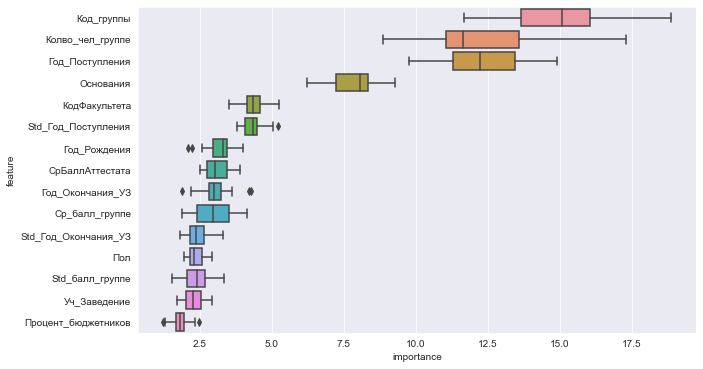

In [130]:
df_feats_imp = plot_importance(data_test, clfs, 0.40, 15)

# Optuna param search

In [123]:
import os
import random
from optuna.samplers import TPESampler # !pip install optuna
import multiprocessing
import catboost as cat
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.utils import resample
from catboost import Pool
import sklearn.metrics

Поиск параметров через оптуна

In [128]:
n_trials = 50
SEED = 10302021

from sklearn.model_selection import TimeSeriesSplit

def objective(trial):
    X = data_train.drop([target], axis = 1)
    y = data_train[target].values
    
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # prepare Time Series cross validation

    F_sores = []

    for train_index, test_index in kf.split(X,y):
        train_x, test_x = X.iloc[train_index], X.iloc[test_index]
        train_y, test_y = y[train_index], y[test_index]
    
        train_pool = Pool(train_x, train_y, cat_features=cat_features)
        test_pool = Pool(test_x, test_y, cat_features=cat_features)

        # Parameters
        params = {
            'depth' : trial.suggest_int('depth', 6, 8),                                       
            'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
            'auto_class_weights' : trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }
        # Learning
        clf = cat.CatBoostClassifier(
            loss_function="MultiClass",
            eval_metric = 'TotalF1',
            task_type="CPU",
            iterations = 100000,
            cat_features = cat_features,
            
            early_stopping_rounds = 100,
            random_seed=SEED,
            train_dir = "crossentropy",
            **params
        )        
        clf.fit(train_pool,
                eval_set=test_pool,
                verbose=200,
                use_best_model=True)
        
        F_Score = clf.best_score_['validation']['TotalF1']
        F_sores.append(F_Score)
        
    mean_F = np.mean(F_sores)
    print('F Score of CatBoost =', mean_F)
    return mean_F



In [129]:
study = optuna.create_study(direction = "maximize", sampler = TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials) #, n_jobs = multiprocessing.cpu_count())

[I 2022-09-17 20:37:56,071] A new study created in memory with name: no-name-41156955-6a96-44d6-b8b0-9cb3dcce6e8e
C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 135ms	remaining: 3h 45m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7214271369
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 241ms	remaining: 6h 40m 57s
200:	learn: 0.7243437	test: 0.6961433	best: 0.6985975 (101)	total: 31.2s	remaining: 4h 18m 6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6985975452
bestIteration = 101

Shrink model to first 102 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 192ms	remaining: 5h 20m 35s


[I 2022-09-17 20:39:01,651] Trial 0 finished with value: 0.714860475456116 and parameters: {'depth': 7, 'learning_rate': 0.0006469018640705369, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.714860475456116.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.714860475456116


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6773942	test: 0.6869297	best: 0.6869297 (0)	total: 241ms	remaining: 6h 41m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6942813976
bestIteration = 22

Shrink model to first 23 iterations.
0:	learn: 0.6868410	test: 0.6644968	best: 0.6644968 (0)	total: 219ms	remaining: 6h 4m 49s
200:	learn: 0.7187702	test: 0.7324018	best: 0.7340931 (148)	total: 25s	remaining: 3h 26m 37s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7340930925
bestIteration = 148

Shrink model to first 149 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 153ms	remaining: 4h 14m 57s


[I 2022-09-17 20:40:02,271] Trial 1 finished with value: 0.7080410305277955 and parameters: {'depth': 6, 'learning_rate': 0.0020656268736430326, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.714860475456116.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6957486016
bestIteration = 5

Shrink model to first 6 iterations.
F Score of CatBoost = 0.7080410305277955


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.7013373	test: 0.6818527	best: 0.6818527 (0)	total: 386ms	remaining: 10h 42m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.717562466
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.7262560	test: 0.7052708	best: 0.7052708 (0)	total: 273ms	remaining: 7h 35m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7052708361
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.7401834	test: 0.7132936	best: 0.7132936 (0)	total: 252ms	remaining: 6h 59m 19s


[I 2022-09-17 20:40:51,957] Trial 2 finished with value: 0.7161508538465989 and parameters: {'depth': 8, 'learning_rate': 0.0013755644728975938, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 2 with value: 0.7161508538465989.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7256192594
bestIteration = 5

Shrink model to first 6 iterations.
F Score of CatBoost = 0.7161508538465989


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 143ms	remaining: 3h 59m 1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7214271369
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 170ms	remaining: 4h 43m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7023843636
bestIteration = 67

Shrink model to first 68 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 197ms	remaining: 5h 28m 54s


[I 2022-09-17 20:41:52,402] Trial 3 finished with value: 0.7161227482271865 and parameters: {'depth': 7, 'learning_rate': 0.0014225627100012401, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 2 with value: 0.7161508538465989.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7161227482271865


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 141ms	remaining: 3h 54m 56s
200:	learn: 0.7784161	test: 0.7922038	best: 0.7922038 (200)	total: 33s	remaining: 4h 33m 26s
400:	learn: 0.8056741	test: 0.8151100	best: 0.8151100 (395)	total: 1m 5s	remaining: 4h 32m 34s
600:	learn: 0.8222539	test: 0.8261588	best: 0.8261588 (596)	total: 1m 39s	remaining: 4h 35m 14s
800:	learn: 0.8298520	test: 0.8307793	best: 0.8310563 (769)	total: 2m 13s	remaining: 4h 35m
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8312292712
bestIteration = 807

Shrink model to first 808 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 173ms	remaining: 4h 47m 45s
200:	learn: 0.7946406	test: 0.7950957	best: 0.7952285 (197)	total: 18.6s	remaining: 2h 34m 12s
400:	learn: 0.8197700	test: 0.8134632	best: 0.8136268 (397)	total: 37.7s	remaining: 2h 36m 8s
600:	learn: 0.8331966	test: 0.8196769	best: 0.8199008 (597)	total: 56.6s	remaining: 2h 36m 7s
Stopped by overfitti

[I 2022-09-17 20:45:41,315] Trial 4 finished with value: 0.7918956006722793 and parameters: {'depth': 7, 'learning_rate': 0.007503925135679946, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7918956006722793.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7918956006722793


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.7013373	test: 0.6818527	best: 0.6818527 (0)	total: 145ms	remaining: 4h 1m 47s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.717562466
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.7262560	test: 0.7052708	best: 0.7052708 (0)	total: 146ms	remaining: 4h 3m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7052708361
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.7401834	test: 0.7132936	best: 0.7132936 (0)	total: 117ms	remaining: 3h 14m 54s


[I 2022-09-17 20:46:18,463] Trial 5 finished with value: 0.7160836511430574 and parameters: {'depth': 8, 'learning_rate': 0.0022903926503094175, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7918956006722793.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7254176513
bestIteration = 5

Shrink model to first 6 iterations.
F Score of CatBoost = 0.7160836511430574


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 97.6ms	remaining: 2h 42m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6952442909
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 120ms	remaining: 3h 19m 49s
200:	learn: 0.7308771	test: 0.7144367	best: 0.7144367 (200)	total: 17.7s	remaining: 2h 26m 36s
400:	learn: 0.7162468	test: 0.7216047	best: 0.7281196 (314)	total: 35s	remaining: 2h 25m 2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7281195854
bestIteration = 314

Shrink model to first 315 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 58.3ms	remaining: 1h 37m 8s


[I 2022-09-17 20:47:13,719] Trial 6 finished with value: 0.7052891721736346 and parameters: {'depth': 7, 'learning_rate': 0.0003538304694900276, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7918956006722793.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6925036401
bestIteration = 3

Shrink model to first 4 iterations.
F Score of CatBoost = 0.7052891721736346


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6773942	test: 0.6869297	best: 0.6869297 (0)	total: 71.2ms	remaining: 1h 58m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6939426052
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 0.6868410	test: 0.6644968	best: 0.6644968 (0)	total: 67ms	remaining: 1h 51m 37s
200:	learn: 0.7110821	test: 0.7181870	best: 0.7221998 (172)	total: 13.4s	remaining: 1h 50m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7225177941
bestIteration = 242

Shrink model to first 243 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 68.7ms	remaining: 1h 54m 28s


[I 2022-09-17 20:47:52,004] Trial 7 finished with value: 0.7040696669673557 and parameters: {'depth': 6, 'learning_rate': 0.00025719504211089517, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7918956006722793.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6957486016
bestIteration = 5

Shrink model to first 6 iterations.
F Score of CatBoost = 0.7040696669673557


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 85.8ms	remaining: 2h 23m 2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7215863876
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 94.4ms	remaining: 2h 37m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7041995564
bestIteration = 61

Shrink model to first 62 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 85.2ms	remaining: 2h 22m 2s


[I 2022-09-17 20:48:28,395] Trial 8 finished with value: 0.7167808960493472 and parameters: {'depth': 7, 'learning_rate': 0.0020730292718398927, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7918956006722793.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7167808960493472


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6812924	test: 0.6828962	best: 0.6828962 (0)	total: 65.5ms	remaining: 1h 49m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7156595913
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 0.6960665	test: 0.6809486	best: 0.6809486 (0)	total: 66.2ms	remaining: 1h 50m 21s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7097571066
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.7122311	test: 0.6917724	best: 0.6917724 (0)	total: 87.8ms	remaining: 2h 26m 15s


[I 2022-09-17 20:48:50,872] Trial 9 finished with value: 0.7087928782991241 and parameters: {'depth': 6, 'learning_rate': 0.00010774495079488041, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7918956006722793.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.700961937
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7087928782991241


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 114ms	remaining: 3h 9m 25s
200:	learn: 0.7687712	test: 0.7795796	best: 0.7796867 (196)	total: 25.3s	remaining: 3h 29m 39s
400:	learn: 0.7995529	test: 0.7912134	best: 0.7912134 (398)	total: 53.6s	remaining: 3h 41m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7928440715
bestIteration = 464

Shrink model to first 465 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 128ms	remaining: 3h 33m 40s
200:	learn: 0.7664033	test: 0.7639177	best: 0.7639177 (200)	total: 25.1s	remaining: 3h 28m 5s
400:	learn: 0.8010738	test: 0.7723933	best: 0.7732470 (394)	total: 52.9s	remaining: 3h 39m 1s
600:	learn: 0.8292666	test: 0.7776131	best: 0.7799603 (567)	total: 1m 21s	remaining: 3h 44m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7799603467
bestIteration = 567

Shrink model to first 568 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 71.5m

[I 2022-09-17 20:52:46,593] Trial 10 finished with value: 0.790274713149209 and parameters: {'depth': 8, 'learning_rate': 0.009284754287039511, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7918956006722793.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7980197212
bestIteration = 406

Shrink model to first 407 iterations.
F Score of CatBoost = 0.790274713149209


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 120ms	remaining: 3h 20m 17s
200:	learn: 0.7694441	test: 0.7798140	best: 0.7809678 (197)	total: 25.3s	remaining: 3h 29m 15s
400:	learn: 0.7990284	test: 0.7912858	best: 0.7955797 (389)	total: 53s	remaining: 3h 39m 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.795579719
bestIteration = 389

Shrink model to first 390 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 131ms	remaining: 3h 39m 1s
200:	learn: 0.7672111	test: 0.7599535	best: 0.7599560 (199)	total: 25.6s	remaining: 3h 32m 10s
400:	learn: 0.8052674	test: 0.7731094	best: 0.7733408 (392)	total: 54.4s	remaining: 3h 45m 7s
600:	learn: 0.8286641	test: 0.7812991	best: 0.7812991 (599)	total: 1m 22s	remaining: 3h 48m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7837852854
bestIteration = 623

Shrink model to first 624 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 104ms	

[I 2022-09-17 20:56:46,081] Trial 11 finished with value: 0.7928685125953434 and parameters: {'depth': 8, 'learning_rate': 0.009077250181928806, 'auto_class_weights': 'Balanced'}. Best is trial 11 with value: 0.7928685125953434.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7992405334
bestIteration = 347

Shrink model to first 348 iterations.
F Score of CatBoost = 0.7928685125953434


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 139ms	remaining: 3h 51m 28s
200:	learn: 0.7708693	test: 0.7804887	best: 0.7804887 (200)	total: 31.9s	remaining: 4h 23m 54s
400:	learn: 0.8013782	test: 0.7910010	best: 0.7913318 (389)	total: 1m 1s	remaining: 4h 14m 57s
600:	learn: 0.8256013	test: 0.7942364	best: 0.7962097 (515)	total: 1m 32s	remaining: 4h 13m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7962096579
bestIteration = 515

Shrink model to first 516 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 134ms	remaining: 3h 43m 54s
200:	learn: 0.7729491	test: 0.7625249	best: 0.7625249 (200)	total: 25.6s	remaining: 3h 32m 16s
400:	learn: 0.8120249	test: 0.7766893	best: 0.7781365 (394)	total: 54.2s	remaining: 3h 44m 32s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7799224202
bestIteration = 450

Shrink model to first 451 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 6

[I 2022-09-17 21:00:51,894] Trial 12 finished with value: 0.7920646267422952 and parameters: {'depth': 8, 'learning_rate': 0.009636043034352764, 'auto_class_weights': 'Balanced'}. Best is trial 11 with value: 0.7928685125953434.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8000618021
bestIteration = 450

Shrink model to first 451 iterations.
F Score of CatBoost = 0.7920646267422952


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 174ms	remaining: 4h 50m 15s
200:	learn: 0.7517453	test: 0.7678214	best: 0.7678214 (200)	total: 25.8s	remaining: 3h 33m 12s
400:	learn: 0.7730820	test: 0.7808534	best: 0.7825045 (349)	total: 51.9s	remaining: 3h 34m 57s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7825045098
bestIteration = 349

Shrink model to first 350 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 152ms	remaining: 4h 13m 56s
200:	learn: 0.7556034	test: 0.7432111	best: 0.7433201 (199)	total: 26.6s	remaining: 3h 40m 22s
400:	learn: 0.7731012	test: 0.7640338	best: 0.7646216 (391)	total: 54.6s	remaining: 3h 46m 3s
600:	learn: 0.7918879	test: 0.7725760	best: 0.7728092 (584)	total: 1m 23s	remaining: 3h 51m 14s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7737417282
bestIteration = 629

Shrink model to first 630 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 84

[I 2022-09-17 21:05:17,520] Trial 13 finished with value: 0.785702352296637 and parameters: {'depth': 8, 'learning_rate': 0.004993177768239595, 'auto_class_weights': 'Balanced'}. Best is trial 11 with value: 0.7928685125953434.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8008608189
bestIteration = 680

Shrink model to first 681 iterations.
F Score of CatBoost = 0.785702352296637


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 120ms	remaining: 3h 20m 7s
200:	learn: 0.7479047	test: 0.7632867	best: 0.7634481 (184)	total: 23.9s	remaining: 3h 17m 38s
400:	learn: 0.7676762	test: 0.7773807	best: 0.7790199 (394)	total: 49.2s	remaining: 3h 23m 44s
600:	learn: 0.7833945	test: 0.7839081	best: 0.7839081 (599)	total: 1m 15s	remaining: 3h 28m 1s
800:	learn: 0.7948524	test: 0.7871164	best: 0.7888885 (777)	total: 1m 42s	remaining: 3h 32m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7890160507
bestIteration = 804

Shrink model to first 805 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 130ms	remaining: 3h 37m 2s
200:	learn: 0.7446628	test: 0.7425162	best: 0.7436875 (187)	total: 24.6s	remaining: 3h 23m 38s
400:	learn: 0.7655319	test: 0.7585862	best: 0.7585862 (399)	total: 50.5s	remaining: 3h 28m 59s
600:	learn: 0.7819231	test: 0.7654599	best: 0.7680537 (584)	total: 1m 16s	remaining: 3h 31m 23s
800:	learn: 0.

[I 2022-09-17 21:11:35,940] Trial 14 finished with value: 0.7891214341075871 and parameters: {'depth': 8, 'learning_rate': 0.004148973328248079, 'auto_class_weights': 'Balanced'}. Best is trial 11 with value: 0.7928685125953434.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8001537955
bestIteration = 894

Shrink model to first 895 iterations.
F Score of CatBoost = 0.7891214341075871


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 114ms	remaining: 3h 9m 28s
200:	learn: 0.7499654	test: 0.7606348	best: 0.7606348 (200)	total: 24.1s	remaining: 3h 19m 22s
400:	learn: 0.7708541	test: 0.7776769	best: 0.7790792 (393)	total: 49.3s	remaining: 3h 24m 2s
600:	learn: 0.7872438	test: 0.7860621	best: 0.7862087 (534)	total: 1m 21s	remaining: 3h 43m 51s
800:	learn: 0.7984086	test: 0.7916618	best: 0.7916618 (799)	total: 1m 49s	remaining: 3h 46m 45s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7930793832
bestIteration = 875

Shrink model to first 876 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 126ms	remaining: 3h 29m 20s
200:	learn: 0.7457909	test: 0.7460732	best: 0.7460732 (200)	total: 25.1s	remaining: 3h 27m 55s
400:	learn: 0.7689906	test: 0.7624767	best: 0.7624767 (397)	total: 51s	remaining: 3h 31m 15s
600:	learn: 0.7856311	test: 0.7737535	best: 0.7748266 (582)	total: 1m 17s	remaining: 3h 35m
Stopped by overfitt

[I 2022-09-17 21:17:44,493] Trial 15 finished with value: 0.7891893067878053 and parameters: {'depth': 8, 'learning_rate': 0.004475740624712831, 'auto_class_weights': 'Balanced'}. Best is trial 11 with value: 0.7928685125953434.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.798282586
bestIteration = 894

Shrink model to first 895 iterations.
F Score of CatBoost = 0.7891893067878053


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 211ms	remaining: 5h 51m 17s
200:	learn: 0.7756419	test: 0.7805223	best: 0.7828678 (199)	total: 30.1s	remaining: 4h 9m 8s
400:	learn: 0.8061702	test: 0.7955226	best: 0.7964861 (369)	total: 1m 1s	remaining: 4h 12m 44s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7964860503
bestIteration = 369

Shrink model to first 370 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 137ms	remaining: 3h 48m 2s
200:	learn: 0.7750881	test: 0.7662929	best: 0.7665297 (197)	total: 29.2s	remaining: 4h 1m 53s
400:	learn: 0.8119444	test: 0.7750972	best: 0.7753277 (396)	total: 59.1s	remaining: 4h 4m 37s
600:	learn: 0.8369918	test: 0.7833750	best: 0.7850290 (522)	total: 1m 31s	remaining: 4h 12m 46s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7850289928
bestIteration = 522

Shrink model to first 523 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 72.1ms

[I 2022-09-17 21:21:56,281] Trial 16 finished with value: 0.7950571123673523 and parameters: {'depth': 8, 'learning_rate': 0.009976915347135165, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.803656294
bestIteration = 458

Shrink model to first 459 iterations.
F Score of CatBoost = 0.7950571123673523


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 131ms	remaining: 3h 38m 20s
200:	learn: 0.7398717	test: 0.7619151	best: 0.7625108 (190)	total: 26.2s	remaining: 3h 36m 43s
400:	learn: 0.7580050	test: 0.7712665	best: 0.7712691 (395)	total: 56.4s	remaining: 3h 53m 22s
600:	learn: 0.7784974	test: 0.7822538	best: 0.7832145 (582)	total: 1m 25s	remaining: 3h 56m 21s
800:	learn: 0.7892067	test: 0.7854102	best: 0.7854102 (800)	total: 1m 57s	remaining: 4h 2m 40s
1000:	learn: 0.8027403	test: 0.7946576	best: 0.7946584 (996)	total: 2m 29s	remaining: 4h 6m 23s
1200:	learn: 0.8136398	test: 0.7931911	best: 0.7966310 (1111)	total: 3m 1s	remaining: 4h 8m 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7966309673
bestIteration = 1111

Shrink model to first 1112 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 149ms	remaining: 4h 8m 13s
200:	learn: 0.7410871	test: 0.7447350	best: 0.7451315 (176)	total: 25.3s	remaining: 3h 29m 23s
400:	learn

[I 2022-09-17 21:29:56,365] Trial 17 finished with value: 0.792138191156304 and parameters: {'depth': 8, 'learning_rate': 0.003872713225787367, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7978001696
bestIteration = 874

Shrink model to first 875 iterations.
F Score of CatBoost = 0.792138191156304


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 145ms	remaining: 4h 1m 46s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7548474428
bestIteration = 54

Shrink model to first 55 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 131ms	remaining: 3h 38m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6784904916
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 70.8ms	remaining: 1h 58m 4s
200:	learn: 0.7243063	test: 0.7595312	best: 0.7596346 (199)	total: 24.1s	remaining: 3h 19m 6s


[I 2022-09-17 21:31:12,600] Trial 18 finished with value: 0.7327678144053325 and parameters: {'depth': 8, 'learning_rate': 0.0006319733365171671, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7649655088
bestIteration = 265

Shrink model to first 266 iterations.
F Score of CatBoost = 0.7327678144053325


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 95.5ms	remaining: 2h 39m 12s
200:	learn: 0.7501009	test: 0.7675773	best: 0.7675773 (200)	total: 19.4s	remaining: 2h 40m 27s
400:	learn: 0.7792691	test: 0.7800785	best: 0.7801967 (398)	total: 39.8s	remaining: 2h 44m 33s
600:	learn: 0.7915397	test: 0.7882818	best: 0.7883888 (580)	total: 1m	remaining: 2h 46m 49s
800:	learn: 0.8084038	test: 0.7922761	best: 0.7928702 (704)	total: 1m 22s	remaining: 2h 50m 38s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7928701879
bestIteration = 704

Shrink model to first 705 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 102ms	remaining: 2h 50m 9s
200:	learn: 0.7527330	test: 0.7512098	best: 0.7513481 (192)	total: 19.9s	remaining: 2h 44m 38s
400:	learn: 0.7757059	test: 0.7695562	best: 0.7699011 (399)	total: 40s	remaining: 2h 45m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7718735411
bestIteration = 477

Shrink model

[I 2022-09-17 21:35:26,227] Trial 19 finished with value: 0.7913351791100333 and parameters: {'depth': 7, 'learning_rate': 0.0068024972875966455, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8092618083
bestIteration = 913

Shrink model to first 914 iterations.
F Score of CatBoost = 0.7913351791100333


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 124ms	remaining: 3h 26m 56s
200:	learn: 0.7435919	test: 0.7527300	best: 0.7540310 (195)	total: 24.1s	remaining: 3h 19m 2s
400:	learn: 0.7611409	test: 0.7728360	best: 0.7737280 (393)	total: 52.4s	remaining: 3h 36m 49s
600:	learn: 0.7736750	test: 0.7806709	best: 0.7817884 (502)	total: 1m 19s	remaining: 3h 38m 46s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7817883761
bestIteration = 502

Shrink model to first 503 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 127ms	remaining: 3h 32m 23s
200:	learn: 0.7442159	test: 0.7379871	best: 0.7383598 (186)	total: 22s	remaining: 3h 2m 26s
400:	learn: 0.7567880	test: 0.7494163	best: 0.7494163 (400)	total: 45.9s	remaining: 3h 10m 5s
600:	learn: 0.7710981	test: 0.7613260	best: 0.7613260 (599)	total: 1m 11s	remaining: 3h 16m 41s
800:	learn: 0.7844843	test: 0.7698935	best: 0.7723931 (768)	total: 1m 37s	remaining: 3h 21m 20s
Stopped by overf

[I 2022-09-17 21:39:48,716] Trial 20 finished with value: 0.779241249341156 and parameters: {'depth': 8, 'learning_rate': 0.0032829708549707137, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7835423025
bestIteration = 504

Shrink model to first 505 iterations.
F Score of CatBoost = 0.779241249341156


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 117ms	remaining: 3h 15m 40s
200:	learn: 0.7554326	test: 0.7656148	best: 0.7660976 (196)	total: 23.1s	remaining: 3h 11m 21s
400:	learn: 0.7803842	test: 0.7829172	best: 0.7829172 (398)	total: 48.8s	remaining: 3h 22m 6s
600:	learn: 0.7996132	test: 0.7931291	best: 0.7931291 (599)	total: 1m 17s	remaining: 3h 33m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.795077084
bestIteration = 655

Shrink model to first 656 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 124ms	remaining: 3h 27m 27s
200:	learn: 0.7544601	test: 0.7508052	best: 0.7513749 (193)	total: 23.7s	remaining: 3h 15m 45s
400:	learn: 0.7825000	test: 0.7689052	best: 0.7689052 (385)	total: 49.4s	remaining: 3h 24m 24s
600:	learn: 0.8014722	test: 0.7723681	best: 0.7755119 (547)	total: 1m 15s	remaining: 3h 27m 16s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7755118785
bestIteration = 547

Shrink m

[I 2022-09-17 21:44:50,864] Trial 21 finished with value: 0.7902908260238249 and parameters: {'depth': 8, 'learning_rate': 0.005968447871273973, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8002835156
bestIteration = 831

Shrink model to first 832 iterations.
F Score of CatBoost = 0.7902908260238249


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 115ms	remaining: 3h 11m 36s
200:	learn: 0.7388486	test: 0.7501180	best: 0.7502769 (193)	total: 23.1s	remaining: 3h 11m 6s
400:	learn: 0.7572470	test: 0.7689590	best: 0.7689590 (387)	total: 46.6s	remaining: 3h 12m 55s
600:	learn: 0.7705148	test: 0.7800018	best: 0.7802400 (598)	total: 1m 12s	remaining: 3h 18m 45s
800:	learn: 0.7841417	test: 0.7840378	best: 0.7847627 (753)	total: 1m 39s	remaining: 3h 24m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.786576959
bestIteration = 863

Shrink model to first 864 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 125ms	remaining: 3h 28m 36s
200:	learn: 0.7291713	test: 0.7379246	best: 0.7406112 (185)	total: 22.8s	remaining: 3h 8m 22s
400:	learn: 0.7488729	test: 0.7469468	best: 0.7494242 (322)	total: 46.7s	remaining: 3h 13m 23s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7494242155
bestIteration = 322

Shrink mo

[I 2022-09-17 21:50:12,490] Trial 22 finished with value: 0.7786023515306336 and parameters: {'depth': 8, 'learning_rate': 0.003075594397936272, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7998058801
bestIteration = 1099

Shrink model to first 1100 iterations.
F Score of CatBoost = 0.7786023515306336


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 113ms	remaining: 3h 7m 53s
200:	learn: 0.7593877	test: 0.7740124	best: 0.7740124 (200)	total: 24.6s	remaining: 3h 23m 44s
400:	learn: 0.7856954	test: 0.7849811	best: 0.7849811 (400)	total: 49.7s	remaining: 3h 25m 53s
600:	learn: 0.8003523	test: 0.7918955	best: 0.7953158 (530)	total: 1m 15s	remaining: 3h 29m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7953157526
bestIteration = 530

Shrink model to first 531 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 125ms	remaining: 3h 27m 50s
200:	learn: 0.7552986	test: 0.7502561	best: 0.7502561 (200)	total: 23s	remaining: 3h 10m 35s
400:	learn: 0.7794530	test: 0.7691031	best: 0.7691042 (398)	total: 48.2s	remaining: 3h 19m 22s
600:	learn: 0.8027346	test: 0.7761865	best: 0.7782970 (539)	total: 1m 14s	remaining: 3h 25m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7782970227
bestIteration = 539

Shrink mo

[I 2022-09-17 21:54:24,963] Trial 23 finished with value: 0.7899852861699995 and parameters: {'depth': 8, 'learning_rate': 0.00626860039948379, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7963430833
bestIteration = 619

Shrink model to first 620 iterations.
F Score of CatBoost = 0.7899852861699995


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 81.3ms	remaining: 2h 15m 33s
200:	learn: 0.7627258	test: 0.7750005	best: 0.7782678 (195)	total: 18s	remaining: 2h 28m 49s
400:	learn: 0.7853677	test: 0.7855919	best: 0.7887856 (358)	total: 37.7s	remaining: 2h 35m 59s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7887855791
bestIteration = 358

Shrink model to first 359 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 83.9ms	remaining: 2h 19m 50s
200:	learn: 0.7635346	test: 0.7578313	best: 0.7580706 (199)	total: 19.2s	remaining: 2h 38m 37s
400:	learn: 0.7898021	test: 0.7703287	best: 0.7713830 (380)	total: 39.1s	remaining: 2h 42m 2s
600:	learn: 0.8097230	test: 0.7778387	best: 0.7778387 (597)	total: 59.2s	remaining: 2h 43m 5s
800:	learn: 0.8294805	test: 0.7813227	best: 0.7817766 (794)	total: 1m 18s	remaining: 2h 41m 51s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7825750177
bestIteration = 833

Shrink mo

[I 2022-09-17 21:57:48,665] Trial 24 finished with value: 0.7908495375250079 and parameters: {'depth': 7, 'learning_rate': 0.008885074934140268, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8011880158
bestIteration = 591

Shrink model to first 592 iterations.
F Score of CatBoost = 0.7908495375250079


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 112ms	remaining: 3h 7m
200:	learn: 0.7435678	test: 0.7532634	best: 0.7532669 (199)	total: 23s	remaining: 3h 10m 29s
400:	learn: 0.7600456	test: 0.7764994	best: 0.7764994 (400)	total: 47s	remaining: 3h 14m 25s
600:	learn: 0.7735425	test: 0.7769213	best: 0.7801564 (540)	total: 1m 12s	remaining: 3h 18m 34s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7801564277
bestIteration = 540

Shrink model to first 541 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 121ms	remaining: 3h 22m 22s
200:	learn: 0.7335045	test: 0.7444569	best: 0.7444569 (200)	total: 23.9s	remaining: 3h 17m 54s
400:	learn: 0.7548480	test: 0.7526826	best: 0.7526826 (400)	total: 48.5s	remaining: 3h 20m 38s
600:	learn: 0.7699459	test: 0.7628467	best: 0.7628467 (593)	total: 1m 14s	remaining: 3h 24m 44s
800:	learn: 0.7845218	test: 0.7690951	best: 0.7700415 (782)	total: 1m 40s	remaining: 3h 26m 39s
1000:	learn: 0.79490

[I 2022-09-17 22:03:55,917] Trial 25 finished with value: 0.7857646806293687 and parameters: {'depth': 8, 'learning_rate': 0.0031997686848238794, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8034963628
bestIteration = 1118

Shrink model to first 1119 iterations.
F Score of CatBoost = 0.7857646806293687


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 109ms	remaining: 3h 1m 29s
200:	learn: 0.7499294	test: 0.7729640	best: 0.7733338 (192)	total: 23.8s	remaining: 3h 16m 40s
400:	learn: 0.7780989	test: 0.7818086	best: 0.7852245 (375)	total: 48.8s	remaining: 3h 21m 48s
600:	learn: 0.7951483	test: 0.7885929	best: 0.7905021 (552)	total: 1m 15s	remaining: 3h 28m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7905021068
bestIteration = 552

Shrink model to first 553 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 125ms	remaining: 3h 29m 6s
200:	learn: 0.7475642	test: 0.7473785	best: 0.7482895 (185)	total: 23.4s	remaining: 3h 13m 45s
400:	learn: 0.7744138	test: 0.7634558	best: 0.7674329 (372)	total: 48.7s	remaining: 3h 21m 26s
600:	learn: 0.7987335	test: 0.7746200	best: 0.7748519 (599)	total: 1m 15s	remaining: 3h 26m 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7775077529
bestIteration = 659

Shrink m

[I 2022-09-17 22:08:46,698] Trial 26 finished with value: 0.7904447634582379 and parameters: {'depth': 8, 'learning_rate': 0.005574993440235896, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8033244307
bestIteration = 708

Shrink model to first 709 iterations.
F Score of CatBoost = 0.7904447634582379


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 87.9ms	remaining: 2h 26m 30s
200:	learn: 0.7661195	test: 0.7763219	best: 0.7795725 (194)	total: 18.7s	remaining: 2h 34m 52s
400:	learn: 0.7912030	test: 0.7882584	best: 0.7891072 (379)	total: 38.1s	remaining: 2h 37m 34s
600:	learn: 0.8115270	test: 0.7929550	best: 0.7944009 (579)	total: 57.6s	remaining: 2h 38m 40s
800:	learn: 0.8238442	test: 0.7964059	best: 0.7978769 (797)	total: 1m 17s	remaining: 2h 40m 13s
1000:	learn: 0.8462042	test: 0.8000133	best: 0.8022440 (983)	total: 1m 37s	remaining: 2h 41m 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8043141975
bestIteration = 1055

Shrink model to first 1056 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 83.5ms	remaining: 2h 19m 12s
200:	learn: 0.7645916	test: 0.7582495	best: 0.7605601 (196)	total: 18.9s	remaining: 2h 36m 19s
400:	learn: 0.7932265	test: 0.7708636	best: 0.7710959 (396)	total: 38.6s	remaining: 2h 39m 49s
Stopped

[I 2022-09-17 22:12:48,279] Trial 27 finished with value: 0.7926553145391723 and parameters: {'depth': 7, 'learning_rate': 0.00989875470216035, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8020914095
bestIteration = 609

Shrink model to first 610 iterations.
F Score of CatBoost = 0.7926553145391723


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 104ms	remaining: 2h 52m 30s
200:	learn: 0.7609464	test: 0.7787916	best: 0.7787916 (200)	total: 23s	remaining: 3h 10m 15s
400:	learn: 0.7869834	test: 0.7853745	best: 0.7875998 (356)	total: 49s	remaining: 3h 22m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7887510082
bestIteration = 491

Shrink model to first 492 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 120ms	remaining: 3h 19m 32s
200:	learn: 0.7604840	test: 0.7566989	best: 0.7566989 (200)	total: 21.8s	remaining: 3h 3s
400:	learn: 0.7901900	test: 0.7689775	best: 0.7689775 (400)	total: 45.8s	remaining: 3h 9m 27s
600:	learn: 0.8142062	test: 0.7759746	best: 0.7760841 (585)	total: 1m 8s	remaining: 3h 8m 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.778029818
bestIteration = 690

Shrink model to first 691 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 67.7ms	remaini

[I 2022-09-17 22:16:38,309] Trial 28 finished with value: 0.7909531258439162 and parameters: {'depth': 7, 'learning_rate': 0.009203255060473184, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8060785513
bestIteration = 521

Shrink model to first 522 iterations.
F Score of CatBoost = 0.7909531258439162


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 111ms	remaining: 3h 4m 56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.696255131
bestIteration = 23

Shrink model to first 24 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 87.4ms	remaining: 2h 25m 37s
200:	learn: 0.7340545	test: 0.7221873	best: 0.7221873 (200)	total: 22.5s	remaining: 3h 6m 6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7374510738
bestIteration = 238

Shrink model to first 239 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 89.3ms	remaining: 2h 28m 53s


[I 2022-09-17 22:17:43,021] Trial 29 finished with value: 0.7087366149790141 and parameters: {'depth': 7, 'learning_rate': 0.0007392067483965633, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6925036401
bestIteration = 3

Shrink model to first 4 iterations.
F Score of CatBoost = 0.7087366149790141


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6773942	test: 0.6869297	best: 0.6869297 (0)	total: 95.7ms	remaining: 2h 39m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.701459483
bestIteration = 12

Shrink model to first 13 iterations.
0:	learn: 0.6868410	test: 0.6644968	best: 0.6644968 (0)	total: 81.7ms	remaining: 2h 16m 5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6708646133
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 78.7ms	remaining: 2h 11m 6s


[I 2022-09-17 22:18:20,143] Trial 30 finished with value: 0.7093713348073397 and parameters: {'depth': 6, 'learning_rate': 0.00010534503687119722, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7557899081
bestIteration = 81

Shrink model to first 82 iterations.
F Score of CatBoost = 0.7093713348073397


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 99ms	remaining: 2h 45m 3s
200:	learn: 0.7560223	test: 0.7697380	best: 0.7697380 (200)	total: 21.4s	remaining: 2h 56m 41s
400:	learn: 0.7779465	test: 0.7830462	best: 0.7849261 (396)	total: 42.6s	remaining: 2h 56m 13s
600:	learn: 0.7926317	test: 0.7887430	best: 0.7913644 (585)	total: 1m 2s	remaining: 2h 52m 56s
800:	learn: 0.8081192	test: 0.7940483	best: 0.7942749 (799)	total: 1m 26s	remaining: 2h 57m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7956332607
bestIteration = 834

Shrink model to first 835 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 96.1ms	remaining: 2h 40m 9s
200:	learn: 0.7548618	test: 0.7535205	best: 0.7535205 (200)	total: 21s	remaining: 2h 53m 38s
400:	learn: 0.7823791	test: 0.7739162	best: 0.7739162 (398)	total: 44.7s	remaining: 3h 5m 1s
600:	learn: 0.8009881	test: 0.7768330	best: 0.7770640 (592)	total: 1m 7s	remaining: 3h 7m 25s
Stopped by overfitti

[I 2022-09-17 22:22:25,999] Trial 31 finished with value: 0.7901442902414404 and parameters: {'depth': 7, 'learning_rate': 0.007137796682625717, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.797504664
bestIteration = 515

Shrink model to first 516 iterations.
F Score of CatBoost = 0.7901442902414404


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6900575	test: 0.6922070	best: 0.6922070 (0)	total: 120ms	remaining: 3h 20m 33s
200:	learn: 0.7433570	test: 0.7660591	best: 0.7660591 (200)	total: 24.2s	remaining: 3h 19m 54s
400:	learn: 0.7651900	test: 0.7785135	best: 0.7785135 (397)	total: 49.6s	remaining: 3h 25m 17s
600:	learn: 0.7825889	test: 0.7834831	best: 0.7837159 (598)	total: 1m 17s	remaining: 3h 34m 53s
800:	learn: 0.7925714	test: 0.7897544	best: 0.7897544 (799)	total: 1m 45s	remaining: 3h 37m 39s
1000:	learn: 0.8071388	test: 0.7936072	best: 0.7951641 (975)	total: 2m 14s	remaining: 3h 40m 57s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7955061286
bestIteration = 1006

Shrink model to first 1007 iterations.
0:	learn: 0.6941054	test: 0.6652423	best: 0.6652423 (0)	total: 131ms	remaining: 3h 37m 46s
200:	learn: 0.7483185	test: 0.7391932	best: 0.7393016 (198)	total: 24.8s	remaining: 3h 25m 35s
400:	learn: 0.7648667	test: 0.7551192	best: 0.7551192 (394)	total: 49.5s	remaining: 3h 25m 5s
600:	lear

[I 2022-09-17 22:29:07,438] Trial 32 finished with value: 0.7914184308926148 and parameters: {'depth': 8, 'learning_rate': 0.004026852880265301, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8052290837
bestIteration = 882

Shrink model to first 883 iterations.
F Score of CatBoost = 0.7914184308926148


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 95.8ms	remaining: 2h 39m 43s
200:	learn: 0.7565271	test: 0.7714966	best: 0.7720831 (199)	total: 20.4s	remaining: 2h 48m 37s
400:	learn: 0.7808686	test: 0.7850300	best: 0.7866777 (389)	total: 42.8s	remaining: 2h 57m 18s
600:	learn: 0.7957858	test: 0.7892501	best: 0.7920009 (581)	total: 1m 4s	remaining: 2h 56m 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7920008924
bestIteration = 581

Shrink model to first 582 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 106ms	remaining: 2h 56m 24s
200:	learn: 0.7546363	test: 0.7547192	best: 0.7551980 (195)	total: 20.1s	remaining: 2h 46m 29s
400:	learn: 0.7856823	test: 0.7691034	best: 0.7694478 (399)	total: 43.7s	remaining: 3h 51s
600:	learn: 0.8050323	test: 0.7743521	best: 0.7756763 (586)	total: 1m 5s	remaining: 3h 1m 41s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7761967806
bestIteration = 643

Shrink model

[I 2022-09-17 22:33:17,071] Trial 33 finished with value: 0.7931116464649853 and parameters: {'depth': 7, 'learning_rate': 0.0073740908144987, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8111372664
bestIteration = 716

Shrink model to first 717 iterations.
F Score of CatBoost = 0.7931116464649853


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6860018	test: 0.6910257	best: 0.6910257 (0)	total: 98.9ms	remaining: 2h 44m 52s
200:	learn: 0.7559061	test: 0.7678886	best: 0.7692618 (199)	total: 23.6s	remaining: 3h 15m 25s
400:	learn: 0.7796507	test: 0.7844590	best: 0.7846916 (399)	total: 45.9s	remaining: 3h 9m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7874809343
bestIteration = 464

Shrink model to first 465 iterations.
0:	learn: 0.6894447	test: 0.6681740	best: 0.6681740 (0)	total: 110ms	remaining: 3h 2m 56s
200:	learn: 0.7550332	test: 0.7535205	best: 0.7535205 (200)	total: 19.6s	remaining: 2h 42m 33s
400:	learn: 0.7816664	test: 0.7726029	best: 0.7726029 (400)	total: 43.5s	remaining: 2h 59m 56s
600:	learn: 0.8044036	test: 0.7763162	best: 0.7794200 (590)	total: 1m 5s	remaining: 3h 1m 12s
800:	learn: 0.8173516	test: 0.7834075	best: 0.7834075 (788)	total: 1m 28s	remaining: 3h 2m 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7856843456
bestIteration = 887

Shrink mod

[I 2022-09-17 22:37:38,306] Trial 34 finished with value: 0.7928350137593556 and parameters: {'depth': 7, 'learning_rate': 0.007109296514595514, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8053397614
bestIteration = 775

Shrink model to first 776 iterations.
F Score of CatBoost = 0.7928350137593556


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 124ms	remaining: 3h 25m 52s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7211920681
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 93.8ms	remaining: 2h 36m 19s
200:	learn: 0.7461473	test: 0.7104531	best: 0.7113009 (193)	total: 20.5s	remaining: 2h 49m 18s
400:	learn: 0.7717132	test: 0.7614983	best: 0.7614983 (400)	total: 39.6s	remaining: 2h 43m 54s
600:	learn: 0.7956003	test: 0.8003661	best: 0.8003661 (600)	total: 58.5s	remaining: 2h 41m 20s
800:	learn: 0.8055250	test: 0.8067202	best: 0.8075388 (783)	total: 1m 18s	remaining: 2h 42m 41s
1000:	learn: 0.8127291	test: 0.8102873	best: 0.8102873 (977)	total: 1m 40s	remaining: 2h 45m 14s
1200:	learn: 0.8215941	test: 0.8138319	best: 0.8138319 (1183)	total: 2m 1s	remaining: 2h 47m 4s
1400:	learn: 0.8258427	test: 0.8189619	best: 0.8189619 (1387)	total: 2m 23s	remaining: 2h 47m 57s
1600:	lear

[I 2022-09-17 22:41:03,177] Trial 35 finished with value: 0.7561869845881283 and parameters: {'depth': 7, 'learning_rate': 0.0026583417456447155, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7561869845881283


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6773942	test: 0.6869297	best: 0.6869297 (0)	total: 109ms	remaining: 3h 50s
200:	learn: 0.7139471	test: 0.7499026	best: 0.7512039 (189)	total: 14.2s	remaining: 1h 57m 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.751203852
bestIteration = 189

Shrink model to first 190 iterations.
0:	learn: 0.6868410	test: 0.6644968	best: 0.6644968 (0)	total: 94.8ms	remaining: 2h 37m 58s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6710775984
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 0.6773429	test: 0.6874029	best: 0.6874029 (0)	total: 89.1ms	remaining: 2h 28m 32s


[I 2022-09-17 22:41:40,685] Trial 36 finished with value: 0.7060100173202816 and parameters: {'depth': 6, 'learning_rate': 0.0014275796623818308, 'auto_class_weights': 'Balanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6957486016
bestIteration = 5

Shrink model to first 6 iterations.
F Score of CatBoost = 0.7060100173202816


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 100ms	remaining: 2h 47m 7s
200:	learn: 0.7750032	test: 0.7869394	best: 0.7869394 (200)	total: 19.6s	remaining: 2h 41m 48s
400:	learn: 0.8078784	test: 0.8152367	best: 0.8152367 (399)	total: 40.3s	remaining: 2h 46m 58s
600:	learn: 0.8229415	test: 0.8272273	best: 0.8274693 (589)	total: 1m 1s	remaining: 2h 50m 39s
800:	learn: 0.8333146	test: 0.8303726	best: 0.8304682 (723)	total: 1m 23s	remaining: 2h 51m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8329172341
bestIteration = 893

Shrink model to first 894 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 90.4ms	remaining: 2h 30m 35s
200:	learn: 0.7978370	test: 0.7998356	best: 0.7998356 (197)	total: 19.7s	remaining: 2h 42m 47s
400:	learn: 0.8212213	test: 0.8107337	best: 0.8109776 (394)	total: 40.7s	remaining: 2h 48m 26s
600:	learn: 0.8341250	test: 0.8192566	best: 0.8201070 (595)	total: 1m 2s	remaining: 2h 52m 35s
800:	learn: 0

[I 2022-09-17 22:45:34,431] Trial 37 finished with value: 0.7944061092165424 and parameters: {'depth': 7, 'learning_rate': 0.007569817495081866, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7944061092165424


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 102ms	remaining: 2h 50m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7215863876
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 88ms	remaining: 2h 26m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7046582197
bestIteration = 73

Shrink model to first 74 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 85.6ms	remaining: 2h 22m 42s


[I 2022-09-17 22:46:13,011] Trial 38 finished with value: 0.7169337838320335 and parameters: {'depth': 7, 'learning_rate': 0.001649070273382451, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7169337838320335


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 91.7ms	remaining: 2h 32m 47s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7120005156
bestIteration = 10

Shrink model to first 11 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 86.3ms	remaining: 2h 23m 50s
200:	learn: 0.7683570	test: 0.7399102	best: 0.7404811 (199)	total: 22.4s	remaining: 3h 5m 14s
400:	learn: 0.8073411	test: 0.8078244	best: 0.8078244 (400)	total: 45.5s	remaining: 3h 8m 28s
600:	learn: 0.8209216	test: 0.8142681	best: 0.8144317 (572)	total: 1m 11s	remaining: 3h 16m 55s
800:	learn: 0.8322451	test: 0.8209620	best: 0.8220376 (794)	total: 1m 38s	remaining: 3h 23m 13s
1000:	learn: 0.8379527	test: 0.8227233	best: 0.8240985 (922)	total: 2m 4s	remaining: 3h 25m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8240985145
bestIteration = 922

Shrink model to first 923 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 1

[I 2022-09-17 22:48:44,390] Trial 39 finished with value: 0.7535519247522681 and parameters: {'depth': 7, 'learning_rate': 0.005186342334059834, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7535519247522681


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6812924	test: 0.6828962	best: 0.6828962 (0)	total: 79.9ms	remaining: 2h 13m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7326203949
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 0.6960665	test: 0.6809486	best: 0.6809486 (0)	total: 65.2ms	remaining: 1h 48m 39s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7097571066
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.7122311	test: 0.6917724	best: 0.6917724 (0)	total: 74.8ms	remaining: 2h 4m 38s


[I 2022-09-17 22:49:08,127] Trial 40 finished with value: 0.7144464794796223 and parameters: {'depth': 6, 'learning_rate': 0.007693479546136886, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.700961937
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7144464794796223


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 103ms	remaining: 2h 52m 21s
200:	learn: 0.7808517	test: 0.7934057	best: 0.7934057 (199)	total: 18.3s	remaining: 2h 31m 47s
400:	learn: 0.8067088	test: 0.8161262	best: 0.8161262 (399)	total: 37.2s	remaining: 2h 34m 11s
600:	learn: 0.8238232	test: 0.8269583	best: 0.8276382 (565)	total: 57.5s	remaining: 2h 38m 33s
800:	learn: 0.8319560	test: 0.8325767	best: 0.8325767 (797)	total: 1m 17s	remaining: 2h 39m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8341292326
bestIteration = 881

Shrink model to first 882 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 87.1ms	remaining: 2h 25m 9s
200:	learn: 0.7944851	test: 0.7953375	best: 0.7953375 (199)	total: 19s	remaining: 2h 36m 53s
400:	learn: 0.8209702	test: 0.8123877	best: 0.8126804 (344)	total: 38.2s	remaining: 2h 38m 3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.817520104
bestIteration = 461

Shrink mode

[I 2022-09-17 22:51:48,379] Trial 41 finished with value: 0.7920686935830347 and parameters: {'depth': 7, 'learning_rate': 0.007464665440374835, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7920686935830347


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 114ms	remaining: 3h 9m 24s
200:	learn: 0.7772584	test: 0.7894601	best: 0.7894601 (200)	total: 18.1s	remaining: 2h 29m 28s
400:	learn: 0.7981243	test: 0.8103714	best: 0.8113174 (397)	total: 37s	remaining: 2h 33m 13s
600:	learn: 0.8122864	test: 0.8243600	best: 0.8254720 (599)	total: 57.3s	remaining: 2h 37m 53s
800:	learn: 0.8257968	test: 0.8315476	best: 0.8315476 (800)	total: 1m 19s	remaining: 2h 43m 12s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8315475572
bestIteration = 800

Shrink model to first 801 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 92.1ms	remaining: 2h 33m 32s
200:	learn: 0.7781953	test: 0.7697611	best: 0.7697611 (200)	total: 23.3s	remaining: 3h 13m 3s
400:	learn: 0.8102897	test: 0.8082017	best: 0.8092512 (385)	total: 44.2s	remaining: 3h 2m 50s
600:	learn: 0.8267186	test: 0.8150695	best: 0.8168793 (533)	total: 1m 4s	remaining: 2h 58m 52s
800:	learn: 0.835

[I 2022-09-17 22:55:00,737] Trial 42 finished with value: 0.7927183332971369 and parameters: {'depth': 7, 'learning_rate': 0.006227115518215009, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7927183332971369


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 108ms	remaining: 3h 37s
200:	learn: 0.7822815	test: 0.7950769	best: 0.7950769 (197)	total: 19.2s	remaining: 2h 39m 4s
400:	learn: 0.8078134	test: 0.8163136	best: 0.8163652 (397)	total: 39.7s	remaining: 2h 44m 27s
600:	learn: 0.8220330	test: 0.8280071	best: 0.8280071 (590)	total: 1m 2s	remaining: 2h 53m 20s
800:	learn: 0.8321857	test: 0.8333726	best: 0.8333726 (797)	total: 1m 24s	remaining: 2h 53m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8344271522
bestIteration = 881

Shrink model to first 882 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 90ms	remaining: 2h 30m 3s
200:	learn: 0.7972727	test: 0.7999864	best: 0.8004190 (199)	total: 20.2s	remaining: 2h 47m 20s
400:	learn: 0.8200493	test: 0.8130360	best: 0.8137240 (388)	total: 40.4s	remaining: 2h 47m 20s
600:	learn: 0.8353276	test: 0.8210244	best: 0.8212481 (595)	total: 1m 1s	remaining: 2h 49m 33s
800:	learn: 0.842621

[I 2022-09-17 22:58:44,928] Trial 43 finished with value: 0.7942804509658687 and parameters: {'depth': 7, 'learning_rate': 0.007777275850375668, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7942804509658687


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 115ms	remaining: 3h 11m
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7214271369
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 118ms	remaining: 3h 15m 58s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7026781905
bestIteration = 79

Shrink model to first 80 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 97.6ms	remaining: 2h 42m 36s


[I 2022-09-17 22:59:26,487] Trial 44 finished with value: 0.7162206905428397 and parameters: {'depth': 7, 'learning_rate': 0.000188178222685838, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7162206905428397


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 104ms	remaining: 2h 53m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7120005156
bestIteration = 10

Shrink model to first 11 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 97.9ms	remaining: 2h 43m 13s
200:	learn: 0.7651745	test: 0.7381394	best: 0.7381394 (200)	total: 21.2s	remaining: 2h 55m 38s
400:	learn: 0.8051361	test: 0.8071702	best: 0.8071702 (399)	total: 39.8s	remaining: 2h 44m 56s
600:	learn: 0.8184588	test: 0.8125565	best: 0.8131635 (598)	total: 59.4s	remaining: 2h 43m 49s
800:	learn: 0.8289875	test: 0.8182324	best: 0.8184346 (770)	total: 1m 20s	remaining: 2h 45m 34s
1000:	learn: 0.8354810	test: 0.8221951	best: 0.8224183 (989)	total: 1m 40s	remaining: 2h 46m 5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8224183221
bestIteration = 989

Shrink model to first 990 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 8

[I 2022-09-17 23:01:38,782] Trial 45 finished with value: 0.752991860633874 and parameters: {'depth': 7, 'learning_rate': 0.0050055638015072896, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.752991860633874


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 111ms	remaining: 3h 5m 34s
200:	learn: 0.7872074	test: 0.8012018	best: 0.8012018 (200)	total: 21.2s	remaining: 2h 55m 21s
400:	learn: 0.8127759	test: 0.8201938	best: 0.8201938 (400)	total: 44.8s	remaining: 3h 5m 23s
600:	learn: 0.8264119	test: 0.8280047	best: 0.8282245 (592)	total: 1m 7s	remaining: 3h 6m 1s
800:	learn: 0.8352892	test: 0.8344187	best: 0.8346408 (770)	total: 1m 28s	remaining: 3h 2m 57s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8346408165
bestIteration = 770

Shrink model to first 771 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 87.2ms	remaining: 2h 25m 15s
200:	learn: 0.7992261	test: 0.8051703	best: 0.8051703 (198)	total: 20.1s	remaining: 2h 46m 2s
400:	learn: 0.8208824	test: 0.8152753	best: 0.8159855 (374)	total: 42.9s	remaining: 2h 57m 42s
600:	learn: 0.8351925	test: 0.8198268	best: 0.8205576 (528)	total: 1m 4s	remaining: 2h 57m 57s
800:	learn: 0.8428

[I 2022-09-17 23:05:05,394] Trial 46 finished with value: 0.7946430669828591 and parameters: {'depth': 7, 'learning_rate': 0.008233465075196697, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7946430669828591


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 90.6ms	remaining: 2h 31m 1s
200:	learn: 0.7839003	test: 0.7974507	best: 0.7974507 (200)	total: 19.9s	remaining: 2h 44m 22s
400:	learn: 0.8077221	test: 0.8193764	best: 0.8193764 (400)	total: 41.3s	remaining: 2h 51m 2s
600:	learn: 0.8240463	test: 0.8263670	best: 0.8292351 (566)	total: 1m 3s	remaining: 2h 54m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8292351191
bestIteration = 566

Shrink model to first 567 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 94.6ms	remaining: 2h 37m 40s
200:	learn: 0.8011508	test: 0.8004904	best: 0.8011903 (196)	total: 19.4s	remaining: 2h 40m 13s
400:	learn: 0.8224851	test: 0.8125809	best: 0.8132694 (396)	total: 40.3s	remaining: 2h 46m 46s
600:	learn: 0.8348010	test: 0.8222583	best: 0.8228369 (584)	total: 1m 1s	remaining: 2h 50m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8229932368
bestIteration = 623

Shrink m

[I 2022-09-17 23:07:42,254] Trial 47 finished with value: 0.7922617000281043 and parameters: {'depth': 7, 'learning_rate': 0.008004245249117034, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7922617000281043


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6831468	test: 0.6828962	best: 0.6828962 (0)	total: 94.5ms	remaining: 2h 37m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7214271369
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 0.6966715	test: 0.6809486	best: 0.6809486 (0)	total: 109ms	remaining: 3h 2m 10s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6997060628
bestIteration = 63

Shrink model to first 64 iterations.
0:	learn: 0.7332115	test: 0.7149878	best: 0.7149878 (0)	total: 86.4ms	remaining: 2h 23m 58s


[I 2022-09-17 23:08:19,466] Trial 48 finished with value: 0.715229981324569 and parameters: {'depth': 7, 'learning_rate': 0.001098522340218207, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7245567442
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.715229981324569


C:\Users\yanbe\AppData\Local\Temp\ipykernel_30352\448085076.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),


0:	learn: 0.6812924	test: 0.6828962	best: 0.6828962 (0)	total: 77.2ms	remaining: 2h 8m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7312562108
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 0.6960665	test: 0.6809486	best: 0.6809486 (0)	total: 99.4ms	remaining: 2h 45m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7097571066
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.7122311	test: 0.6917724	best: 0.6917724 (0)	total: 94ms	remaining: 2h 36m 36s


[I 2022-09-17 23:08:43,396] Trial 49 finished with value: 0.7139917514621449 and parameters: {'depth': 6, 'learning_rate': 0.0024141588566182837, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 16 with value: 0.7950571123673523.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.700961937
bestIteration = 1

Shrink model to first 2 iterations.
F Score of CatBoost = 0.7139917514621449


In [131]:
study.best_value

0.7950571123673523

In [132]:
for k,v in study.best_params.items():
    print(f"\t\t{k}:{v}")

		depth:8
		learning_rate:0.009976915347135165
		auto_class_weights:Balanced
